#### Notes

* Website:  https://venturecapitalflows.com/cs109/

#### Imports

In [1]:
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
from pylab import *
from sklearn.decomposition import PCA
from sklearn import tree
import math
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, r2_score, average_precision_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.base import ClassifierMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn import datasets
from sklearn import svm
from statsmodels.regression.linear_model import OLS
from operator import methodcaller
import datetime
import time
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
get_ipython().magic(u'matplotlib inline')
import copy

<h1><center>THE ECONOMICS OF VENTURE CAPITAL</center></h1> 

<h3><center>CS 109a Final Project</center></h3> 
<h3><center>Jason Cui, Luke Heine, Promit Ghosh, Cole Scanlon</center></h3> 

# Project Overview
____________________________

## Motivation & Growing Importance

A cornerstone of entrepreneurship, modern venture capital arose from investment firms formerly specializing in railroads and traditional machines with the first firm specializing in investment into Boston’s textile industry (Florida 1996, Hambrecht 1984). Once a profession where ‘men had a difficulty describing to their wives what they
did,’ venture capitalism now underscores the success of three of the world’s five most valuable companies as firms have restructured their need for upfront capital in hopes of rapid scaling (Florida 1996, Green and McNaughton 1987, Hambrecht 1984).

With the perceived impact of venture capital on innovation rising, cities and governments are increasingly crafting economic policies to capture venture capital funding for their own regions or fund their own. A 2001 National Governors Association report stated "Venture capital is critical to growing the new businesses that will drive the
‘new economy’. Finding ways to nurture the culture of entrepreneurs, and the capital that feeds them, must be the top priority of states" (Henry Chen a, et al. 2009). The National Association of Seed and Venture Funds estimated that state venture capital funds in 2008 totaled 2.3 billion; meanwhile, an increasing share of the approximately $50 billion that states spend on industrial incentive areas is going to venture-backed firms (Henry
Chen a, et al. 2009). 

## Entrepreneurship’s Impact on the Economy
Entrepreneurship has been a primary driver of U.S. job growth over the past thirty years and, even in times of recession, job growth of start-up companies has remained relatively stable. As venture capital becomes a more active part in structuring and incentivizing it, VC provides an opportunity to approximate entrepreneurial activity within fast-scaling sectors.

However, how do local economies impact these forms of entrepreneurship as seen through the venture capital that funds it?

## Data Description

Our data is a combination of datasets to allow the type of relational description we conduct, specifically between venture capital and economic performance. 

Our first dataset is all the records from 2000-2014 of crowd submitted venture capital investments and instances. This amounts to 60,000 individual investment instances within multiple categories.

The dataset also includes:
    - acquisitions
    - rounds
    - companies represented
    - locations of those companies and raised amount
    
To assess the impact the American Recovery had on this data, we also used the 2000-2014 Census to download a custom datasheet of economic statistics associated with MSA. Some of the statistics in this dataset include:
    - racial demographics
    - unemployment
    - health care coverage
    - upper quintile of earnings

## Data Source

To attain these datasets, we coordinated with Harvard Business School and used Harvard's access to Social Explorer to download the MSA data. To merge the datasets, we combined data on a company's Metropolitan Statistical Area. 

## Data Limitations
The Crunchbase Venture Capital data is crowd sourced and, therefore, the quality of it can be porous at times, tempering the trust we can place in any specific round. We treated this using imputations of NA data. However, while the trust we can put in individual instances is limited, in aggregate, it does allow us to still make claims.

Our economic data is extremely reliable because all of it came from government sources, namely the Census Bureau.

## Methodological Limitations
A methodological limitation of our analysis is that the total spatial presence -- where a company recruits, where the founders are from, etc. -- may not be capture by only the positioning of its headquarters. Therefore, resulting in factors not capture in our data. As most startups are small companies, however, this has limited impact in the overall context of our study, as we can make some assumptions of a limited geographic reach.

## Objectives from this Data Study

In conducting this exploratory research, we sought to answer three primary questions:

* (I) What are the dynamics of venture capital funding in the United States of America, including geographical, sector, industry, and round size trends?


* (II) What is the relationship between venture capital flow and economic performance of an area? 


* (III) Which demographical characteristics -  such as education, median age, income - influence venture capital funding of an area? 

The overarching theme of our project, and the three questions above, is:
<h4><center> What is the impact of venture capital on the economy and the impact of the economy on venture capital? 

_________________________

# Data Exploration

# (I) Venture Capital Funding Analysis

Through the analysis of venture capital funding in the United States, we sought to uncover trends and the general dynamics of venture capital funding. This itself is valuable because it can offer insights into how venture capital operates currently, which is helpful from both a finance, start-up, and policy perspective. However, for our purposes, this is also extremely valuable because it can offer insights which can then be used for our model of venture capital and economic performance. 

## Load Investment Data

In [2]:
#Load Crunchbase Venture Capital dataset regarding venture capital investments
data = pd.read_csv('datasets/investments.csv',sep=',')

#Convert data to Pandas dataframe
df = pd.DataFrame(data)

/Users/colescanlon/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Remove Outliers per Crunchbase's stated range

In [3]:
#Remove observations in 2014
df = df[df.funded_year != 2014]

#Remove observations before 1990
df = df[df.funded_year > 1990]

## Illustrate Change in Investment Frequency over Time

In the graph below, venture capital funding has increased over time. As a caveat, it is possible that more rounds reported within this dataset as Crunchbase became more well-known over time. However, while this may have influenced the data, the trends fit with those referenced in a substantial body of other research.

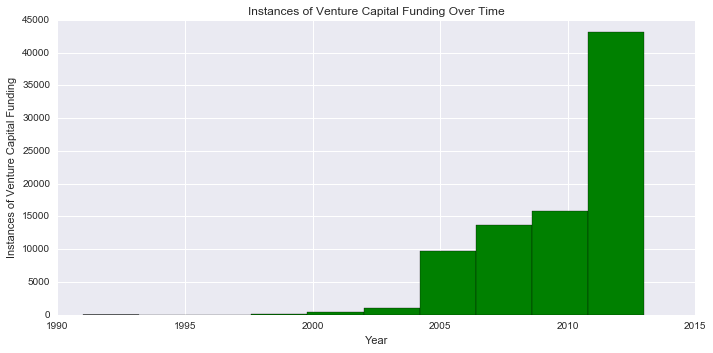

In [4]:
#Function for plotting a histogram
def plot_hist(data, title, x_label,y_label, face, axes):
    
    #set axis
    axes.hist(data.dropna(), alpha=1, color=face)
    
    #set title and labels
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    
    return axes


#Plot histograms 
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1 = plot_hist(df['funded_year'],
                'Instances of Venture Capital Funding Over Time', 
                'Year',"Instances of Venture Capital Funding", 
                'green', 
                ax1)
plt.tight_layout()
plt.show()

________________________

# Understanding Our Venture Capital Data

Figure 1 illustrates the venture capital funding has increased in absolute terms over time. There are four more granular trends we sought to investigate through our analysis:


* Series Trends


* Geographical Trends


* Sector Trends


* Acquisition Trends

## 1) Series Trends

Venture capital is typically categorized into different types, based on the nature of the funding. Venture capital is the overarching terms to refer to "financing that investors provide to startup companies and small businesses that are believed to have long-term growth potential" (1). The Crunchbase Venture Capital Dataset categorized venture capital into the following series types:

* Angel


* Crowdfunding


* Post-IPO


* Private Equity


* Series A


* Series B


* Series C+ 


* Venture 


* Other

## Analysis Takeaways

- In absolute terms, as figure 1 indicated, venture capital has increased. 

- Rounds are generally right skewed, possibly indicating a want to stay within lower-categorized round sizes. This may be due to dilution if companies enter later rounds or perhaps sly ways to attract more funding in the future by staying within a certain round size.

- The main driver in the increase of rounds within the VC space are the increasing amount of round investments classified as series A or B.

- ##### I want to be able to say that definitions of round sized have changed here

Citation (1): Investopedia http://www.investopedia.com/terms/v/venturecapital.asp#ixzz4RuECDkgH 

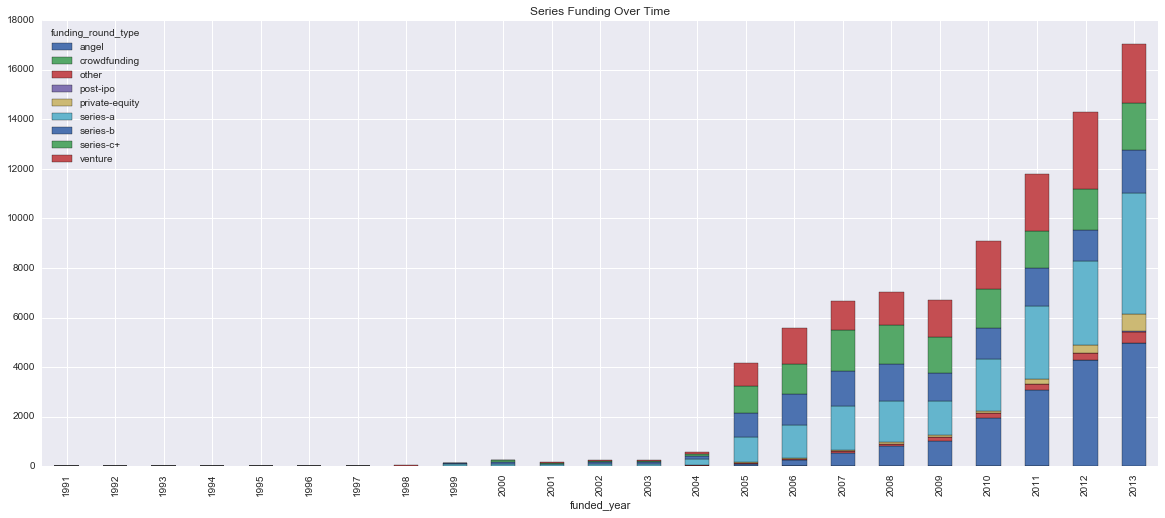

In [5]:
year_table = pd.crosstab(index=df["funded_year"], 
                          columns=df["funding_round_type"])

year_table.plot(kind="bar", 
                 figsize=(20,8),
                 stacked=True, title = "Series Funding Over Time")

## Series Trend Graph Discussion

Here we see that the instance amount of series A and B values increased the most out of all other types. One can conclude from the graph below that series A and series B funding has been growing both in absolute terms in terms of the proportion of total venture capital funding. This may be due to the increasing knowledge of venture capital and these sorts of investment styles. Here, we see that C+ rounds haven't increased as quickly. This makes intuitive sense as ultimately these rounds are extremely expensive and only fund the most established companies. Therefore, while more rounds are being seeded and this investment form experiences an increase in popularity, it importantly does not indicate the round quality or the distribution of funds within these investment types. Prior to 2010, there will little to none private equity investment, which is no longer the case. Interestingly, crowdfunding - in absolute terms - has remained relatively constant.

## Plotting Series Amount per Round 

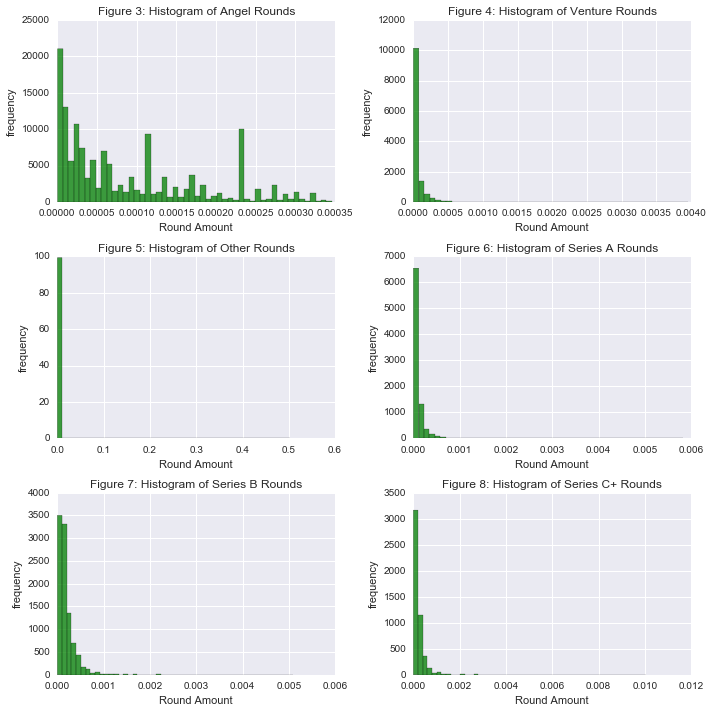

In [7]:
## Load data

raw_data = pd.read_csv('datasets/rounds.csv')

def helper (x):
    x = str(x)
    x =datetime.datetime.strptime(x, '%m/%d/%y')
    return x

## Break Data into Rounds
raw_data['funded_at_stamp'] =raw_data['funded_at'].map(helper, na_action = 'ignore')
data= raw_data

#data['funded_at'] =data['funded_at'].map(lambda x: x.datetime('%d-%m-%'))
series_angel = data[data['funding_round_type']=='angel']
series_venture = data[data['funding_round_type']=='venture']
series_other = data[data['funding_round_type']=='other']
series_a = data[data['funding_round_type']=='series-a']
series_b = data[data['funding_round_type']=='series-b']
series_c = data[data['funding_round_type']=='series-c']
series_cplus = data[data['funding_round_type']=='series-c+']

values_angel = series_angel['raised_amount_usd'].dropna()
values_venture = series_venture['raised_amount_usd'].dropna()
values_other = series_other['raised_amount_usd'].dropna()
values_a = series_a['raised_amount_usd'].dropna()
values_b = series_b['raised_amount_usd'].dropna()
values_c = series_c['raised_amount_usd'].dropna()
values_cplus = series_cplus['raised_amount_usd'].dropna()

series = series_venture.dropna()

#function for plotting histograms
def plot_hist(data, title, x_lab, face, ax):
    ax.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_ylabel('frequency')
    
    return ax
    
#plot histograms for each marker and each demographics
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))
ax1 = plot_hist(values_angel/np.sum(values_angel),
                'Figure 3: Histogram of Angel Rounds', 
                'Round Amount', 
                'green', 
                ax1)

ax2 = plot_hist(values_venture/np.sum(values_venture),
                'Figure 4: Histogram of Venture Rounds', 
                'Round Amount', 
                'green', 
                ax2)

ax3 = plot_hist(values_other/np.sum(values_other),
                'Figure 5: Histogram of Other Rounds', 
                'Round Amount', 
                'green', 
                ax3)

ax4 = plot_hist(values_a/np.sum(values_a),
                'Figure 6: Histogram of Series A Rounds', 
                'Round Amount', 
                'green', 
                ax4)

ax5 = plot_hist(values_b/np.sum(values_b),
                'Figure 7: Histogram of Series B Rounds', 
                'Round Amount', 
                'green', 
                ax5)

ax6 = plot_hist(values_cplus/np.sum(values_cplus),
                'Figure 8: Histogram of Series C+ Rounds', 
                'Round Amount', 
                'green', 
                ax6)

plt.tight_layout()
plt.show()

## Series Amount Per Round Graph Discussion

Standardizing values to allow accurate visual representation, we see that the funding amounts are right skewed in nature. Here, we see that the most variation seems to occur in Angel and Series B rounds.

## Proportions of Funding by Sector

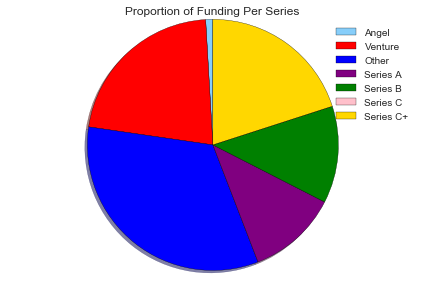

In [8]:
labels = ['Angel', 'Venture','Other', 'Series A','Series B', 'Series C', 'Series C+']
sizes = [values_angel.sum(), values_venture.sum(), values_other.sum(), values_a.sum(), values_b.sum(), values_c.sum(), values_cplus.sum()]
colors = ['lightskyblue', 'red', 'blue', 'purple', 'green', 'pink', 'gold']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Proportion of Funding Per Series')
plt.tight_layout()
plt.show()

## Proportions of Funding by Sector Graph Discussion

We can see in the graphs above that most of the funding is classified as 'Other" followed by Venture, Series C+, and Series B. There appears to be very little Angel Funding and hardly any series C funding.


## 2) Geographical Trends

The second exploration of venture capital funding in the United States involves understanding how venture capital functions geographically. 


Here we show that VC-funded companies vary widely per sector. We used the plaintext names of each company to find latitude/longitude and scatter dependent on these.

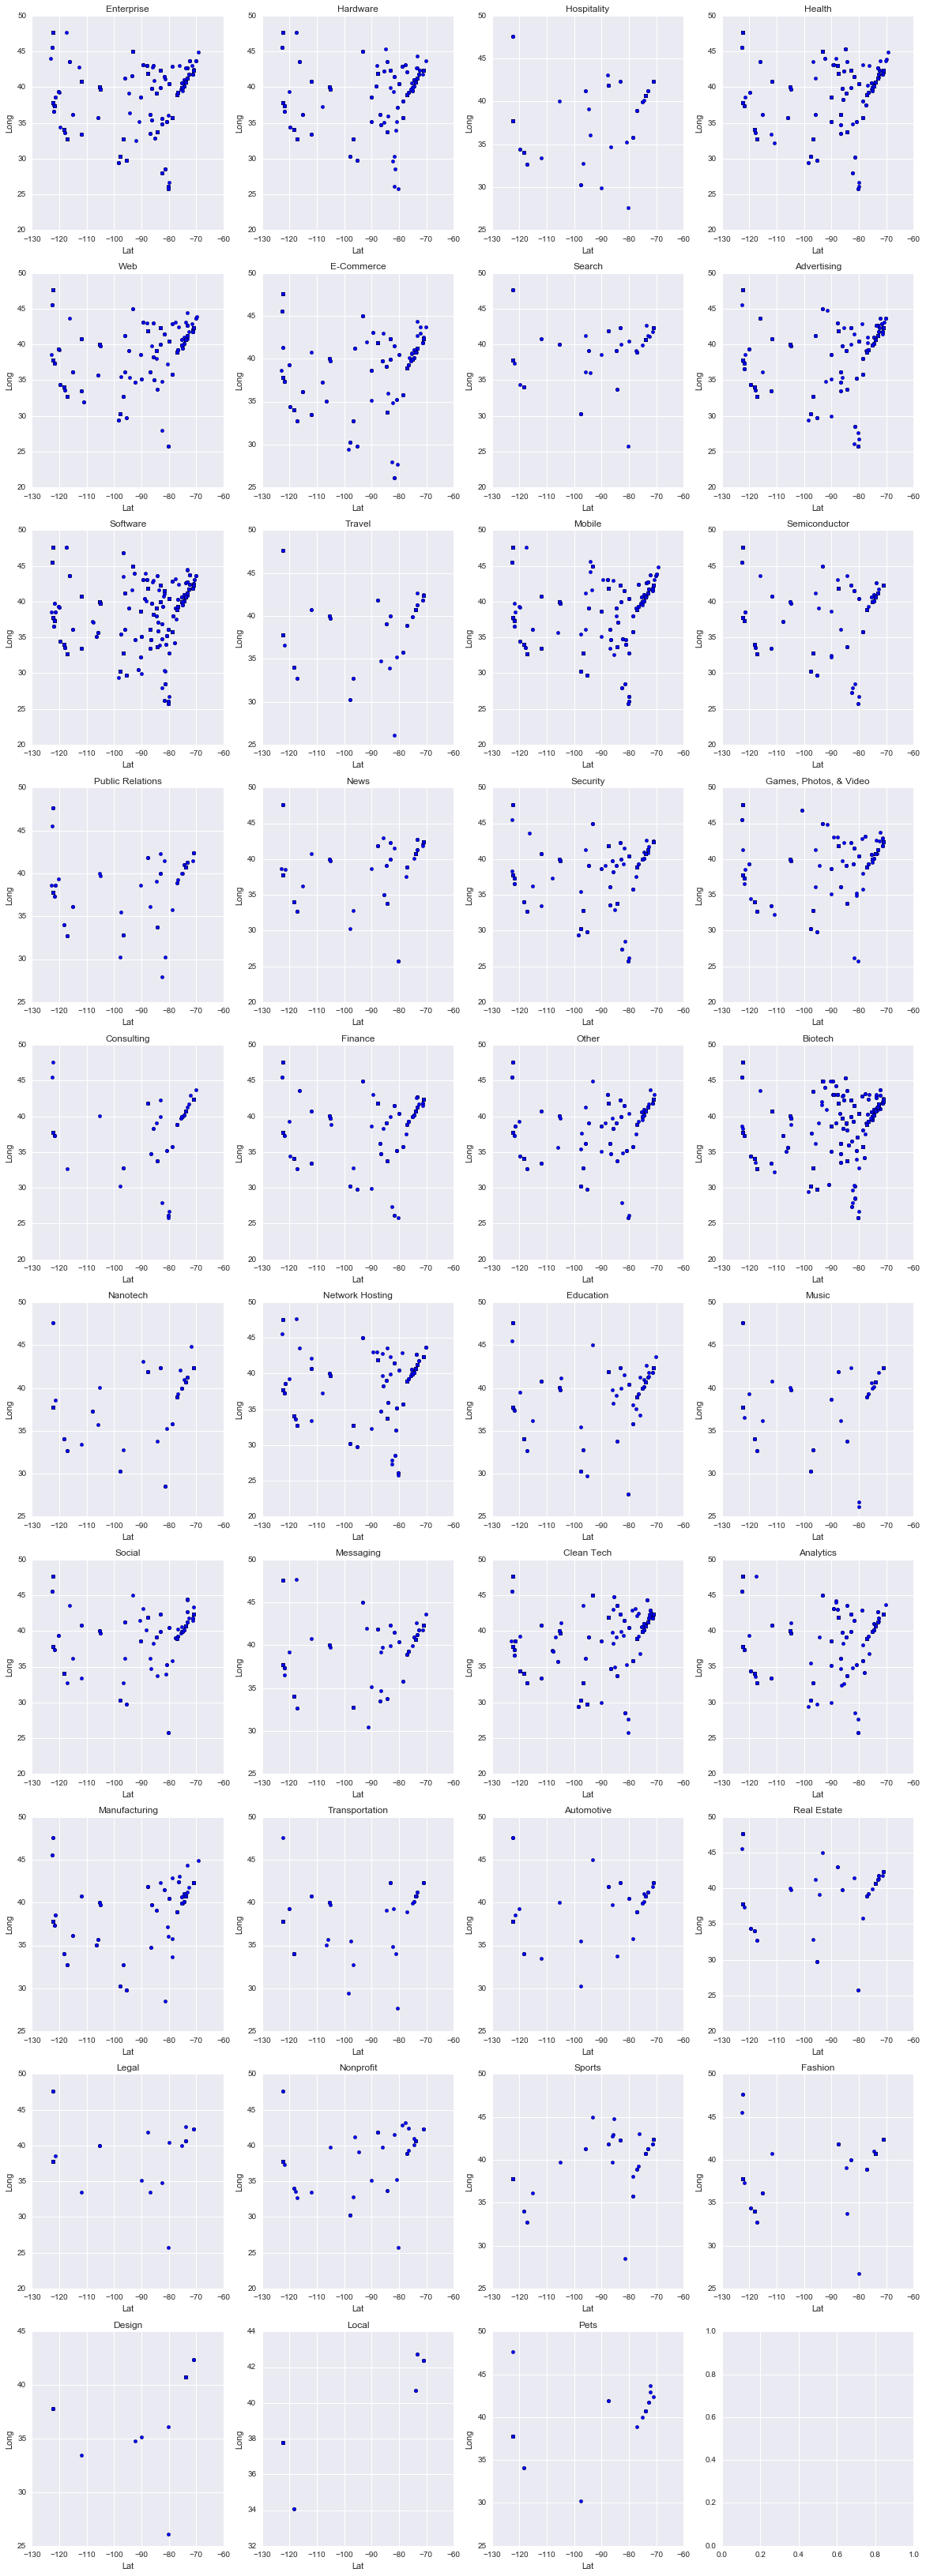

In [206]:
geo_data = pd.read_csv('datasets/geo.csv', delimiter=',')
us_data = geo_data[geo_data['investor_country'] == 'USA']

# snag all unique company codes
sector_names = us_data['company_category'].unique()

## Create holder array for below scatter plot
holder_array =[]
x=0
for x in range(0,10):
    for row in range(0,4):
        holder_array.append(x)
    x += 1


fig, ax = plt.subplots(10, 4, figsize=(20, 50))
fig.subplots_adjust(bottom=0.01)
for x in range(0,len(sector_names)):

    ax[holder_array[x], x%4].scatter(us_data['investor_long'][(us_data["company_category"] ==sector_names[x])], us_data['investor_lat'][(us_data["company_category"] == sector_names[x])], c='b', label ='low-income')
    ax[holder_array[x], x%4].set_xlabel('Lat')
    ax[holder_array[x], x%4].set_ylabel('Long')
    ax[holder_array[x], x%4].set_title(sector_names[x])


## Cities Where Most Funded Cities Are Located 

A critical limitation of the scatterplots is that while they indicate where companies are, they don't display the frequency of companies within the same region. To do so, let's count the frequency at which companies are created within certain regions. 

In [207]:
#Print top 10 cities for comapnies that recieve funding
us_data['company_region'].value_counts().head(10)

San Francisco, CA          15491
Greater Boston, MA          3799
New York City, NY           3627
Greater Los Angeles, CA     2041
Seattle, WA                 1331
Washington, D.C.            1016
San Diego, CA               1007
San Jose, CA                 944
Austin, TX                   761
Chicago, IL                  638
Name: company_region, dtype: int64

### Discussion
Here, we see that San Francisco has approximately four times the amount of companies started as those started in the second most represented start-up city, Boston. Here, we can see the immense weight and impact the city holds.

## Heat Map of Venture Capital Activity
To add to our geographic understanding of where our data is coming from, we now create a heat map to see the intensity of where activity is occurring.

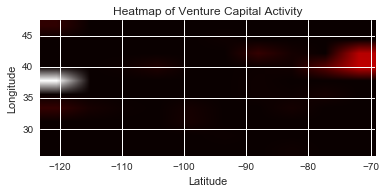

In [208]:
heatmap, xedges, yedges = np.histogram2d(us_data['investor_long'], us_data['investor_lat'], bins= (10,10))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T , cmap='hot', extent=extent, origin='lower')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('Heatmap of Venture Capital Activity')
plt.show()

## Heat Map of Venture Capital Activity Discussion

Here, we see that the main players in the American space are on the coasts. Therefore, let's conduct an East compared to West coast comparison to see how these regions compare in how their investment strategy and style.

## Comparing East and West Coast Activity

In [209]:
#get data
p_data = pd.read_csv('datasets/investments.csv', sep=',')

#usa data only
p_usa = p_data[p_data['company_country_code'] == 'USA']

#different categories of startups
p_categories = list(set(p_data['company_category_code'].dropna(axis=0).tolist()))

#dictionary of state to time zone mappings I found online
p_state2timezone = { 'AK': 'US/Alaska', 'AL': 'US/Central', 'AR': 'US/Central', 'AS': 'US/Samoa', 'AZ': 'US/Mountain', 'CA': 'US/Pacific', 'CO': 'US/Mountain', 'CT': 'US/Eastern', 'DC': 'US/Eastern', 'DE': 'US/Eastern', 'FL': 'US/Eastern', 'GA': 'US/Eastern', 'GU': 'Pacific/Guam', 'HI': 'US/Hawaii', 'IA': 'US/Central', 'ID': 'US/Mountain', 'IL': 'US/Central', 'IN': 'US/Eastern', 'KS': 'US/Central', 'KY': 'US/Eastern', 'LA': 'US/Central', 'MA': 'US/Eastern', 'MD': 'US/Eastern', 'ME': 'US/Eastern', 'MI': 'US/Eastern', 'MN': 'US/Central', 'MO': 'US/Central', 'MP': 'Pacific/Guam', 'MS': 'US/Central', 'MT': 'US/Mountain', 'NC': 'US/Eastern', 'ND': 'US/Central', 'NE': 'US/Central', 'NH': 'US/Eastern', 'NJ': 'US/Eastern', 'NM': 'US/Mountain', 'NV': 'US/Pacific', 'NY': 'US/Eastern', 'OH': 'US/Eastern', 'OK': 'US/Central', 'OR': 'US/Pacific', 'PA': 'US/Eastern', 'PR': 'America/Puerto_Rico', 'RI': 'US/Eastern', 'SC': 'US/Eastern', 'SD': 'US/Central', 'TN': 'US/Central', 'TX': 'US/Central', 'UT': 'US/Mountain', 'VA': 'US/Eastern', 'VI': 'America/Virgin', 'VT': 'US/Eastern', 'WA': 'US/Pacific', 'WI': 'US/Central', 'WV': 'US/Eastern', 'WY': 'US/Mountain'}

#separate time zones into east and west coast
p_timezones = set(p_state2timezone.values())
p_eastzones = ['America/Puerto_Rico', 'America/Virgin', 'US/Eastern', 'US/Central', 'US/Samoa']
p_westzones = list(p_timezones.difference(set(p_eastzones)))
p_eaststates, p_weststates = [], []
for p_key in p_state2timezone:
    if p_state2timezone[p_key] in p_eastzones:
        p_eaststates.append(p_key)
    else:
        p_weststates.append(p_key)

#separate data into east and west zones
p_eastdata = p_usa[p_usa['company_state_code'].isin(p_eaststates)]
p_westdata = p_usa[p_usa['company_state_code'].isin(p_weststates)]

#list of different series types
p_series = list(set(p_data['funding_round_type'].dropna(axis=0).tolist()))

#list of investors by location
p_east_investors = p_usa[p_usa['investor_state_code'].isin(p_eaststates)]
p_west_investors = p_usa[p_usa['investor_state_code'].isin(p_weststates)]

In [210]:
#create a function that tally's up each sector's count and prints the top 5 sectors
def p_five_most_popular_categories(df, title, color):
    temp_category_list = copy.copy(p_categories)
    temp_category_length_list = []
    temp_most_popular = dict()
    #get number of startups per category
    for c in p_categories:
        temp_category_length_list.append(int(df[df['company_category_code'] == c].size))
    #determine 5 most popular categories
    for c in range(5):
        #index of category that is most popular in list
        index = temp_category_length_list.index(max(temp_category_length_list))
        #remove corresponding category from temp list and append to most popular
        temp_most_popular[temp_category_list.pop(index)] = temp_category_length_list[index]
        #delete the max value from list of values
        del temp_category_length_list[index]
    #create a graph of 5 most popular categories
    plt.figure(figsize=(10,10), dpi=200)
    X = np.arange(5)
    Y = []
    X_labels = []
    for key, value in temp_most_popular.iteritems():
        X_labels.append(key)
        Y.append(value)
    ind = np.arange(5)  # the x locations for the groups
    width = 0.5       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Y, width, color=color, align='center')
    
    ax.set_ylabel('Number of Startups')
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(X_labels)
    plt.show()

## Comparing East and West Funding Amounts
Here, we see proportionately that West coast companies raise more funding than those in the East as compared to the distribution of companies. This may show that the East Coast has robust finances centers and that West companies secure more funding. Historically this would make sense and creates a hypothesis that we can test.

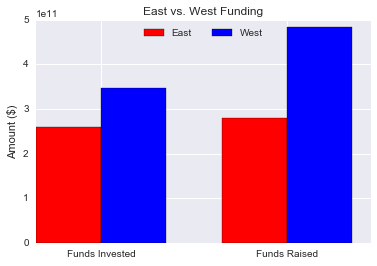

In [211]:
#amount funded from each location
p_east_funding_out = sum(p_east_investors['raised_amount_usd'].dropna(axis=0).tolist())
p_west_funding_out = sum(p_west_investors['raised_amount_usd'].dropna(axis=0).tolist())
#amount funded into each location
p_east_funding_in = sum(p_eastdata['raised_amount_usd'].dropna(axis=0).tolist())
p_west_funding_in = sum(p_westdata['raised_amount_usd'].dropna(axis=0).tolist())
#create graph
X = np.arange(2)
Y1 = [p_east_funding_out, p_east_funding_in]
Y2 = [p_west_funding_out, p_west_funding_in]
X_labels = ['Funds Invested', 'Funds Raised']
ind = np.arange(2)  # the x locations for the groups
width = 0.35      # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Y1, width, color='r')
rects2 = ax.bar(ind + width, Y2, width, color='b')

ax.set_ylabel('Amount ($)')
ax.set_title('East vs. West Funding')
ax.set_xticks(ind + width)
ax.set_xticklabels(X_labels)


ax.legend(('East', 'West'), ncol=2, loc='upper center')

plt.show()

## Comparing East and West Funds Invested

Here we see that funds are distributed differently among the coasts. We see that West Coast funding for all categories is larger in size than the East. That said, we see that is proportionately most true with Series A and C. With venture, we see more similar funding amounts proportionately.

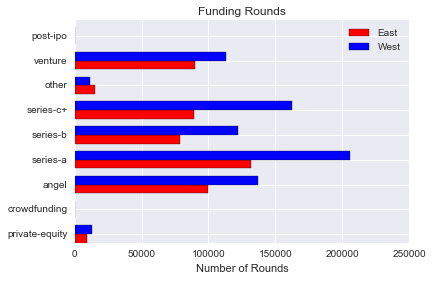

In [212]:
#create graph
X = np.arange(len(p_series))
Y1, Y2 = [], []

#populate Y1, Y2 by going through each label
for s in p_series:
    Y1.append(p_eastdata[p_eastdata['funding_round_type'] == s].size)
    Y2.append(p_westdata[p_westdata['funding_round_type'] == s].size)

X_labels = p_series

ind = np.arange(len(p_series))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(ind, Y1, width, color='r')
rects2 = ax.barh(ind + width, Y2, width, color='b')

ax.set_xlabel('Number of Rounds')
ax.set_title('Funding Rounds')
ax.set_yticks(ind + width)
ax.set_yticklabels(X_labels)

ax.legend((rects1[0], rects2[0]), ('East', 'West'))

plt.show()

## 3) Sector Analysis

Here, we see that software and biotech have the most funding instances with in our dataset. Interesting, although software had the most instances of VC funding, it does not have the most absolute amount of VC funding. Biotech receives the most VC funding dollars followed by software, mobile, and lastly cleantech. Cleantech refers to any process, product, or service that reduces negative environmental impacts through significant energy efficiency improvements, the sustainable use of resources, or environmental protection activities.

In [213]:
#Load rounds data
data = pd.read_csv('datasets/rounds.csv',sep=',')

# Get all the sector names and store in a list
sector_counts = data['company_category_code'].value_counts()
sectors = data['company_category_code'].value_counts().index.tolist()

#Turn sectors into dataframe
sectors = pd.DataFrame(sectors)

#Calculate amount of funding recieved by companies in each sector
amount = data.groupby('company_category_code')['raised_amount_usd'].sum()

#Turn into dataframe
amount = pd.Series.to_frame(amount)

#Rename column
sectors.columns = ["sector"]

#Define sector
sector = sectors["sector"]

#Define funded list 
funded = []

#Define sector list
sect_list = []

#Create a list of the amount each sector raised
for i in range(len(amount)):
    s = amount['raised_amount_usd'][i] 
    funded.append(s)

#Create a list of sectors
for i in range(len(sector)):
    sec = sector[i]
    sect_list.append(sec)
    
data = [funded, sect_list]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

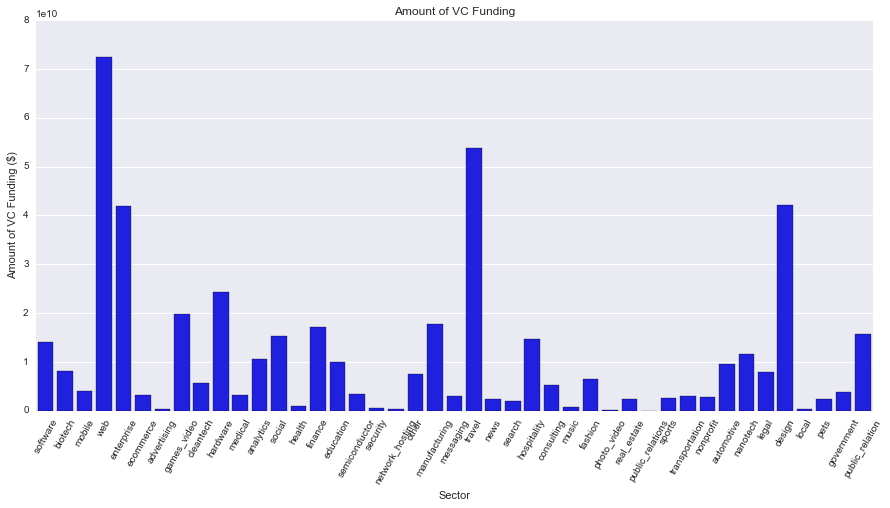

In [214]:
# plot
plot = sns.barplot(sect_list,funded,  color='blue')

# remove top and right line of plot 
sns.despine()

# set size of grap
plot.figure.set_size_inches(15,7)

# set title 
plot.axes.set_title('Amount of VC Funding')

# set x label
plot.set_xlabel("Sector")

# set y label
plot.set_ylabel("Amount of VC Funding ($)")

# rotate tick labels so they don't overlap
plt.xticks(rotation=60)

In [215]:
#Print top 10 sectors
sector_counts[0:10]

software       8304
biotech        7041
mobile         3995
web            3992
enterprise     3647
ecommerce      2902
advertising    2561
games_video    2322
cleantech      2151
hardware       2060
Name: company_category_code, dtype: int64

## Comparing Sectors on the East and West

Attempting to gain a better idea of our data's granularity, we now investigate our dataset by instance. Here, we see that more enterprise companies are proportionately being founded on the East coast whereas we see that on the West Coast mobile companies are--again proportionately-- more represented.

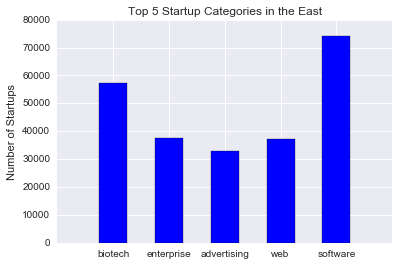

In [216]:
#East
p_five_most_popular_categories(p_eastdata, 'Top 5 Startup Categories in the East', 'blue')

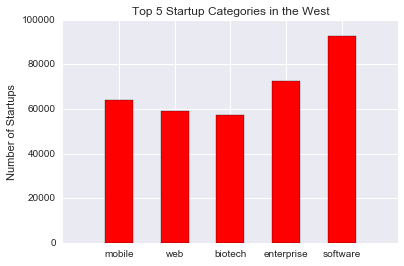

In [217]:
#West
p_five_most_popular_categories(p_westdata, 'Top 5 Startup Categories in the West', 'red')

## Comparing Sectors on the East and West Analysis

It is evident in the graphs above that a large proportion of startups on both the east and west coasts come from the software sector. On the west coast, a large number also come from the mobile and enterprise sectors. On the east coast, a large number also come from biotech, which is unsurprising given east-coast cities such as Boston are called 'hubs' for biotech start-ups.

## 4) Acquisition Trends

In exploring trends in acquisitions, we found that only a very small fraction of acquisitions is actually disclosed. Although a decent number of acquisitions are occurring, acquisition amounts are being left out intentionally by either the acquirer or the company being acquired.

In [218]:
data = pd.read_csv('datasets/aquisitions.csv', delimiter=',', header=0)

# to store number of disclosed acquisitions
disclosed = 0

# loop through all rows of dataframe
for i in range(data.shape[0]):
    
    # if price amount is disclosed, +1 to number of disclosed
    if math.isnan(data['price_amount'][i]) == False:
        
        # add it in
        disclosed += 1

/Users/colescanlon/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


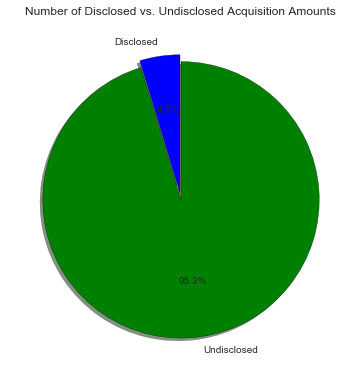

In [219]:
# undisclosed
undisclosed = data.shape[0] - disclosed

# plot percentages
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Disclosed', 'Undisclosed'
fracs = [float(100* disclosed)/float(data.shape[0]), float(100* undisclosed)/float(data.shape[0])]
explode=(0, 0.05)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
#                 The default startangle is 0, which would start
#                 the Frogs slice on the x-axis.  With startangle=90,
#                 everything is rotated counter-clockwise by 90 degrees,
#                 so the plotting starts on the positive y-axis.

title('Number of Disclosed vs. Undisclosed Acquisition Amounts')

show()

## An Interesting Thought
What is the likelihood of a startup getting more funding given it has some amount of funding? This has use for startups as then the first round of money raised may provide an indication for future funds, and would be a very interesting question to answer. Unfortunately, we do not have data for how much money startups got on their first round of funding, only how much they have gotten total.


____________________________

# Rounds Prediction Model

## Ask Questions

Is it possible to predict how many funding rounds a startup might raise given its current characteristics? Investing early has a greater risk, but also a greater return. A model that could accurately predict how many rounds a startup will raise could help investors determine if it's worth getting on the startup.


## Data Collection - Load Data

In [264]:
data = pd.read_csv('datasets/companies.csv')

In [265]:
data['status'].unique() #4 unique values

array(['operating', 'closed', 'acquired', 'ipo'], dtype=object)

### Create Imputer function

Sometimes it makes sense to try to predict in the missing information based on the characteristics of the known information. I've defined an imputer function to do this in case it is necessary

In [266]:
# Create imputer function to create different imputer strategies easily
def imputer(input_value, strategy_value):
    
    # http://stackoverflow.com/questions/30584543/sklearn-imputer-returned-features-does-not-fit-in-fit-function
    #initialise the model
    imp = Imputer(missing_values='NaN', strategy=strategy_value, axis=0)

    #train the model
    imp.fit(input_value)
    imp_data = imp.transform(input_value)

## Refining the Data

It seems that not all companies in the dataset are from the USA. However, we're only concerned companies within the USA.

In [267]:
#usa data only
#creating a copy allows me to overwrite NULL with 'unknown' when necessary
usa = data[data['country_code'] == 'USA'].copy(deep=True)

## Data Exploration

Let's take a look at our list of columns.

In [268]:
list(p_usa.columns.values)

['MSA',
 'company_category_code',
 'company_state_code',
 'company_region',
 'company_city',
 'investor_permalink',
 'investor_name',
 'investor_category_code',
 'investor_country_code',
 'investor_state_code',
 'investor_region',
 'investor_city',
 'funding_round_type',
 'funded_at',
 'funded_month',
 'funded_quarter',
 'funded_year',
 'raised_amount_usd']

### Dropping Columns

Columns such as permalink, name, country, and homepage url don't seem relevant. Permalink and homepage url won't affect the results as they're just addresses to the site itself. Country would matter if we were to look at a model addressing our question at an international level, but all startups in the data are from the USA, so this can be removed.

Name seems relevant - after all, a clever or accurate name could unconsciously influence a VC firm to pay attention to one startup over another. However, while there are correlations between the first letter of the startup's name and their success, there is no causality, and for that reason I will drop this column as well.

Study on names: http://www.weklarbusinessinstitute.com/can-name-startup-affect-funding/

In [270]:
del usa['permalink']
del usa['name']
del usa['homepage_url']
del usa['country_code'] #they're already all from the USA

### Replacing NaNs

There seem to be missing values. Let's see which columns are most affected.

In [271]:
print usa.shape
usa.isnull().sum()

(22545, 15)


MSA                   3696
category_code          960
funding_total_usd     2079
status                   0
state_code             304
region                   0
city                   359
funding_rounds           0
founded_at            4221
founded_month         4221
founded_quarter       4221
founded_year          4221
first_funding_at        95
last_funding_at         95
last_milestone_at    10075
dtype: int64

### Interpreting Results

While there are a multitude of predictors remaining, they all seem pertinent to whether a startup could get additional rounds of funding. 

The geographical factors are important - whether a startup is in an area where VC funding is plenty vs an area where it's rare makes a difference, as evidenced by the heat map visualization earlier in the notebook. While one may argue that only one geography-data column is necessary to accommodate for this different, we believe that the breakdown in location is equally important. After all, the main city San Francisco could have many more startups than the surrounding cities, a possible connection that could be lost by removing any of the geographical columns.

Additionally, when a startup was funded and the round timings can have an impact as well. A startup funded very early on is less likely to have VC funding simply because VC funding is a relatively modern phenomenon. Pre-2005 VC funding was quite rare.

Category code also has quite a few missing values, but these can be placed in "unknown". Thus, I am inclined not to delete this column either.

Thus, I cannot find a reason to delete any of the remaining columns. I will instead change null values to "unknown".


In [273]:
usa['MSA'] = usa['MSA'].fillna(value = 'unknown')
usa['category_code'] = usa['category_code'].fillna(value = 'unknown')
usa['funding_total_usd'] = usa['funding_total_usd'].fillna(value = 'unknown')
usa['status'] = usa['status'].fillna(value = 'unknown')
usa['state_code'] = usa['state_code'].fillna(value = 'unknown')
usa['region'] = usa['region'].fillna(value = 'unknown')
usa['city'] = usa['city'].fillna(value = 'unknown')
usa['funding_rounds'] = usa['funding_rounds'].fillna(value = 'unknown')
usa['founded_at'] = usa['founded_at'].fillna(value = 'unknown')
usa['founded_month'] = usa['founded_month'].fillna(value = 'unknown')
usa['founded_quarter'] = usa['founded_quarter'].fillna(value = 'unknown')
usa['founded_year'] = usa['founded_year'].fillna(value = 'unknown')
usa['first_funding_at'] = usa['first_funding_at'].fillna(value = 'unknown')
usa['last_funding_at'] = usa['last_funding_at'].fillna(value = 'unknown')
usa['last_milestone_at'] = usa['last_milestone_at'].fillna(value = 'unknown')

In [274]:
print usa.shape
usa.isnull().sum()

(22545, 15)


MSA                  0
category_code        0
funding_total_usd    0
status               0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
founded_month        0
founded_quarter      0
founded_year         0
first_funding_at     0
last_funding_at      0
last_milestone_at    0
dtype: int64

There are no missing values. However, we're only interested in startups that are currently operating, as startups that have been acquired, shut down, or are post-IPO will not be receiving additional rounds of funding.

In [275]:
usa_operating = usa[usa['status'] == 'operating']

## Data Modeling

### Get Dummies

In [282]:
usa_operating  = pd.get_dummies(usa_operating)

### Split Data

Here we split the data into training and testing sets.

In [283]:
#Split data into training and testing 
train, test = train_test_split(usa_operating, test_size=0.5, random_state = 200)

In [284]:
y_train = train['funding_rounds']
x_train = train.drop('funding_rounds', 1)

y_test = test['funding_rounds']
x_test = test.drop('funding_rounds', 1)

### Creating a Rounds Prediction Model

In [285]:
def fit_tree(x, y, x_test, y_test, depth):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeRegressor(max_depth = depth)
    dt.fit(x, y)
    return dt.score(x_test, y_test)

In [286]:
for i in range(1, 21, 1):
    print 'depth:', i
    print 'tree accuracy:', fit_tree(x_train, y_train, x_test, y_test, i)

depth: 1
tree accuracy: 0.0516227642098
depth: 2
tree accuracy: 0.0846310859504
depth: 3
tree accuracy: 0.0979472517557
depth: 4
tree accuracy: 0.106817894269
depth: 5
tree accuracy: 0.123246088732
depth: 6
tree accuracy: 0.136570041447
depth: 7
tree accuracy: 0.140143642165
depth: 8
tree accuracy: 0.148423898728
depth: 9
tree accuracy: 0.122512303636
depth: 10
tree accuracy: 0.136259653591
depth: 11
tree accuracy: 0.108986074203
depth: 12
tree accuracy: 0.12005735758
depth: 13
tree accuracy: 0.110521241004
depth: 14
tree accuracy: 0.0929540193512
depth: 15
tree accuracy: 0.10607505182
depth: 16
tree accuracy: 0.0778021881642
depth: 17
tree accuracy: 0.0909442921556
depth: 18
tree accuracy: 0.0767771872505
depth: 19
tree accuracy: 0.0858012156464
depth: 20
tree accuracy: 0.0822724716813


### Model Analysis

The benefits of a decision tree include:
* Decision trees implicitly perform variable screening or feature selection
* Decision trees require relatively little effort for data preparation
* Nonlinear relationships between parameters do not affect tree performance
* Easy to interpret and explain

These advantages make decision trees the optimal choice for this model. While one can intuitively reason towards whether a variable could make a difference to the model, decision trees order their importance as part of the model-building process. There is no data normalization needed for decision trees, and nonlinear relationships (which exist per visualizations earlier in the notebook) are accounted for. Given a larger dataset and a more powerful machine, multi-core analysis is also already built into the model, which means decision trees can be fitted and applied much faster than single-core models such as Linear Regression or Linear Discriminant Analysis. 

While the decision tree had the best results with depth 9, the scores indicate this model is not very accurate. This indicates that given that a company is operating, it is difficult to tell how many rounds total that company will receive before it is acquired, IPOs, or closes.


____________________________

# 4) Acquisition Trends

## Ask Questions

In exploring trends in acquisitions, we found that only a very small fraction of acquisitions is actually disclosed. Although a decent number of acquisitions are occurring, acquisition amounts are being left out intentionally by either the acquirer or the company being acquired. Here, what we aim to do is make a predictor that guesses the outcome of a company based off a target value.

## Data Collection - Load Data

In [62]:
#Load aquisitions data
data = pd.read_csv('datasets/aquisitions_new.csv', delimiter=',', header=0)

## Data Exploration

### Define Imputer for Filling in Gaps

In [291]:
# Define imputer to fill in missing values 
def imputer(data):
    imp = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
    imp.fit(data)
    imp_data = imp.transform(data)
    imp_data = pd.DataFrame(imp_data)
    return imp_data

### Inspection of rounds acquired to not acquired 

In [295]:
print "Number of Companies in Dataset Aquired: ", data['acquired'].value_counts()[1]
print "Number of Companies in Dataset Not Aquired: ", data['acquired'].value_counts()[0]

Number of Companies in Dataset Aquired:  5622
Number of Companies in Dataset Not Aquired:  55079


### Visualize Data

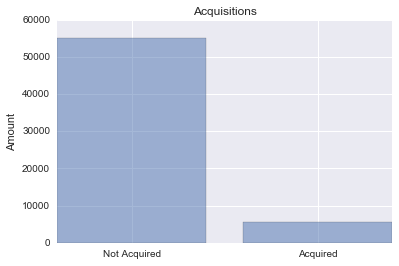

In [296]:
## Visualize Data
objects = ('Not Acquired', 'Acquired')
y_pos = np.arange(len(objects))
performance = [data['acquired'].value_counts()[0],data['acquired'].value_counts()[1]]
 
# Graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Amount')
plt.title('Acquisitions')

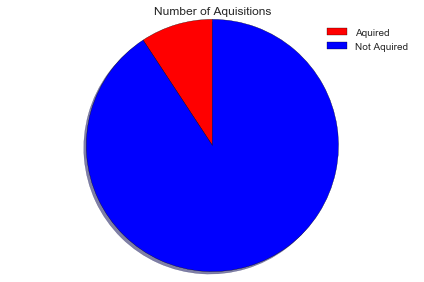

In [75]:
labels = ['Aquired', 'Not Aquired']
sizes = [float(data['acquired'].value_counts()[1]), float(data['acquired'].value_counts()[0])]
colors = ['red', 'blue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Number of Aquisitions')
plt.tight_layout()
plt.show()

As evidenced by the visualization, most companies are not acquired.

## Data Modeling

### Reshape and Add Values

In [297]:
reshaped = data['raised_amount_usd'].values.reshape(-1,1)
data['raised_amount_usd'] = imputer(reshaped)
data = data.fillna('unknown')
data.isnull().values.any()


False

There are no null values in the data.

### Delete Nonrelevant Columns

In [298]:
## delete non-relevant columns 
del data['company_name']
del data['company_permalink']

Company name and the company's homepage URL are not influential variables.

### Define Functions

In [299]:
def fit_tree(x, y, x_test, y_test, depth):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeRegressor(max_depth = depth)
    dt.fit(x, y)
    return dt.score(x_test, y_test)

def fit_ols(x, y, x_test, y_test):
    # FIT DECISION TREE MODEL
    model = Lin_Reg()
    model.fit(x, y)
    return model.score(x_test, y_test)

def fit_total_funding(data, name):
    data = pd.get_dummies(data)
    test, train = train_test_split(data, test_size=.7, random_state = 200)
    y_train = train[name]
    x_train = train.drop(name, 1)
    y_test = test[name]
    x_test = test.drop(name, 1)
    return fit_tree(x_train, y_train, x_test, y_test, 3)#, fit_ols(x_train, y_train, x_test, y_test) 




## Model Analysis

Will holding the geographical area constant help the model be accurate?

In [300]:
print 'Total', fit_total_funding(data, 'acquired')
print 'SF Bay', fit_total_funding(data[data['company_region']== 'SF Bay'], 'acquired')
print 'New York', fit_total_funding(data[data['company_region']== 'New York'], 'acquired')
print 'Boston', fit_total_funding(data[data['company_region']== 'Boston'], 'acquired')

Total 0.0844245506998
SF Bay 0.0934044708584
New York 0.0477778808807
Boston 0.101618843768


It seems that the model is not very good with location held constant. Perhaps it'll be better at predicting within ranges of raised funding?

In [301]:
print 'Over .5 mil', fit_total_funding(data[data['raised_amount_usd']> 5000000], 'acquired')
print 'Over 1 mil', fit_total_funding(data[data['raised_amount_usd']> 10000000], 'acquired')
print 'Over 2 mil', fit_total_funding(data[data['raised_amount_usd']> 20000000], 'acquired')

Over .5 mil 0.098886986537
Over 1 mil 0.0960054058907
Over 2 mil 0.0417178234094


This doesn't seem to help either. Perhaps seperating the companies by operating status may have an effect?

In [302]:
data = pd.read_csv('datasets/companies.csv', delimiter=',', header=0)
data['status'].value_counts()

operating    29609
acquired      2914
closed        2833
ipo            642
Name: status, dtype: int64

In [303]:
def helper(x):
    if x == 'closed':
        return 0
    elif x == 'operating':
        return 1
    elif x == 'acquired':
        return 2
    elif x == 'ipo':
        return 3
        
        

In [304]:
data['outcomes'] = data['status'].map(lambda x: helper(x))

In [305]:
del data['category_code']
del data['permalink']
del data ['name']
del data['homepage_url']
del data['country_code']
del data['state_code']
del data['region']
del data['city']
del data['founded_quarter']
del data['founded_month']
del data['founded_year']
del data['status']
data = data.fillna('unknown')

## Fit on Predicting All Outcomes

In [306]:
fit_total_funding(data, 'outcomes')

0.021715746829660376

_________________

# Venture Capital Prediction Model

## Ask Questions

The goal of the very first venture funding model is to see if it is possible to predict how much a company is funded (gross total funding amount) based on various characteristics of that company. Intuitively this seems like a very difficult task to accomplish because there are not only numerous factors that can determine a company’s success, but also that future companies might not necessarily mirror their predecessors. This is fundamental to the idea that technology is constantly changing and being redefined.


Thus, the goal is to create as accurate as of a model as possible -- no model is perfect but this tool could be incredibly useful to startups in the future who wish to determine their potential funding amounts based on predictors including company location, series round, industry, and much more. 

## Data Collection - Load the data

In [2]:
#Load Crunchbase Venture Capital dataset regarding venture capital investments
data = pd.read_csv('datasets/investments.csv',sep=',')

#Convert data to Pandas dataframe
df = pd.DataFrame(data)

/Users/colescanlon/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Create Imputer Function

In [3]:
# Create imputer function to create different imputer strategies easily
def imputer(input_value, strategy_value):
    
    # http://stackoverflow.com/questions/30584543/sklearn-imputer-returned-features-does-not-fit-in-fit-function
    #initialise the model
    imp = Imputer(missing_values='NaN', strategy=strategy_value, axis=0)

    #train the model
    imp.fit(input_value)
    imp_data = imp.transform(input_value)

## Data Exploration
In order to create a model predicting what company characteristics influence the amount of money a company raises, we must make data decisions with our models.

### Selecting Columns
What we first do is inspect the columns and see which one are and aren’t relevant. We do this as we want to be conscious about what variables we have in our model.


In [4]:
list(data.columns.values)

['MSA',
 'company_permalink',
 'company_name',
 'company_category_code',
 'company_country_code',
 'company_state_code',
 'company_region',
 'company_city',
 'investor_permalink',
 'investor_name',
 'investor_category_code',
 'investor_country_code',
 'investor_state_code',
 'investor_region',
 'investor_city',
 'funding_round_type',
 'funded_at',
 'funded_month',
 'funded_quarter',
 'funded_year',
 'raised_amount_usd']

### Dropping Columns
Through this introspection, we dropped many of the repeat models encoding geography along with company permalink, investor permalink, and the repeat declarations of time.

In [5]:
del data['investor_permalink']
del data['company_name']
del data['company_permalink']
del data['company_country_code']
del data['company_city']
del data['investor_state_code']
del data['investor_country_code']
del data['investor_city']
del data['funded_month']
del data['funded_quarter']
del data['funded_year']
del data['MSA']
del data['company_state_code']

### Replacing NaN Values
With this restricted amount of data, so that we can model the data we replace NaN values with ‘unknown.’ When we drop data, this will allow us to retain these values. We deploy this method for the sector code. 

In [6]:
data['investor_category_code']=data['investor_category_code'].fillna( value = 'unknown')
data['company_category_code']=data['company_category_code'].fillna( value = 'unknown')
data['company_region']=data['company_region'].fillna( value = 'unknown')
data['investor_name']=data['investor_name'].fillna( value = 'unknown')
data['investor_region']=data['investor_region'].fillna( value = 'unknown')
data['funding_round_type']=data['funding_round_type'].fillna( value = 'unknown')
data['funded_at']=data['funded_at'].fillna( value = 'unknown')

### Counting NaN Values and Cleaning Data
Checking the amount the amount of NaN’s in the total amount of data, we find that ~ 10% of our data are NaN values. In order to compute a model on this, we drop this data, and then save to a new data frame.

In [7]:
print data.shape
data.isnull().sum()

(86952, 8)


company_category_code        0
company_region               0
investor_name                0
investor_category_code       0
investor_region              0
funding_round_type           0
funded_at                    0
raised_amount_usd         9221
dtype: int64

In [8]:
data = data[np.isfinite(data['raised_amount_usd'])]

### Split Data

Splitting the data into two halves allows us to fit and score the model we create.

In [9]:
train, test = train_test_split(data, test_size=0.5, random_state = 200)

In [10]:
y_train = train['raised_amount_usd']
x_train = train.drop('raised_amount_usd', 1)

y_test = test['raised_amount_usd']
x_test = test.drop('raised_amount_usd', 1)

In [11]:
x_train.head()

,company_category_code,company_region,investor_name,investor_category_code,investor_region,funding_round_type,funded_at
70356,mobile,Seattle,John Keister,unknown,unknown,angel,40396
715,games_video,SF Bay,Nexon,other,Los Angeles,venture,40627
7652,mobile,Boston,Matrix Partners,unknown,SF Bay,series-b,39237
10668,software,Grenoble,Serena Capital,unknown,Paris,series-b,40799
80958,advertising,London,Qualcomm Ventures,unknown,San Diego,series-b,40940


In [12]:
train.head()

,company_category_code,company_region,investor_name,investor_category_code,investor_region,funding_round_type,funded_at,raised_amount_usd
70356,mobile,Seattle,John Keister,unknown,unknown,angel,40396,550000.0
715,games_video,SF Bay,Nexon,other,Los Angeles,venture,40627,7712103.0
7652,mobile,Boston,Matrix Partners,unknown,SF Bay,series-b,39237,15000000.0
10668,software,Grenoble,Serena Capital,unknown,Paris,series-b,40799,11000000.0
80958,advertising,London,Qualcomm Ventures,unknown,San Diego,series-b,40940,12000000.0


## Baseline Model

In the baseline model, we can predict the amount of funding a startup received by the mean of their sector. 

In [13]:
def baseline_model(train, x_test, y_test):
    sector_means = train.groupby('company_category_code')['raised_amount_usd'].mean()
    y_pred = []
    y_real = []
    for i in range(len(x_test)): 
        sector = sector_means[x_test['company_category_code'].values[i]]
        y_pred.append(sector)
        y_real.append(y_test.values[i])
    score = r2_score(y_pred, y_real)
    return score

In [14]:
baseline_model(train, x_test, y_test)

-59.306929204609375

In [15]:
def baseline_prediction(train, x_test):
    sector_means = train.groupby('company_category_code')['raised_amount_usd'].mean()
    sector = x_test['company_category_code']
    prediction = sector_means[sector]
    return prediction

In [16]:
print "Baseline Model Prediction: $", baseline_prediction(train, x_test[0:1])[0]

Baseline Model Prediction: $ 10484879.0508


In [17]:
print "Actual Venture Capital Funding: $", y_test.values[0]

Actual Venture Capital Funding: $ 1250000.0


### Model Analysis
Clearly this model - that predicts the amount of funding a company receives by the mean of the company's sector - does not perform very well.



## Creating a Better Model 
Here, seeing the power of the decisional tree model in the past, we decide to use the predictive power of it to then create a baseline model that we then use to assess the predictive power. Critically, here, we are using a decision tree predictor and not a classifier. This is because we are doing prediction not classification.

### Get Dummies

In [18]:
data = pd.get_dummies(data)

### Split Data

In [19]:
train, test = train_test_split(data, test_size=0.5, random_state = 200)

y_train = train['raised_amount_usd']
x_train = train.drop('raised_amount_usd', 1)

y_test = test['raised_amount_usd']
x_test = test.drop('raised_amount_usd', 1)

In [20]:
def fit_tree_score(x, y, x_test, y_test, depth):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeRegressor(max_depth = depth)
    dt.fit(x, y)
    return dt.score(x_test, y_test)

### Model Analysis

Here we see that our model has a relatively stable fit and does a does a decent job of showing some relationship between the two values. It seems there is no improvement for depths over a value of 10. For reasons stated earlier in the notebook, the decision tree is the best method for this model.

### Optimizing the Depth

We can optimize the depth of the decision tree model to get a better score. 

In [22]:
for i in range(5, 16, 1):
    print "Depth:", i
    print "Decision Tree Score:", fit_tree_score(x_train, y_train, x_test, y_test, i)

 Depth: 5
Decision Tree Score: 0.404951310401
Depth: 6
Decision Tree Score: 0.422399153706
Depth: 7
Decision Tree Score: 0.455471381176
Depth: 8
Decision Tree Score: 0.483931156284
Depth: 9
Decision Tree Score: 0.495683475551
Depth: 10
Decision Tree Score: 0.497305885781
Depth: 11
Decision Tree Score: 0.490690493722
Depth: 12
Decision Tree Score: 0.498700512553
Depth: 13
Decision Tree Score: 0.494931281026
Depth: 14
Decision Tree Score: 0.498977465732
Depth: 15
Decision Tree Score: 0.498176717309


## Selecting a Model

We can see above, that the decision tree performs best when the decision tree has a depth of 13. We will use this depth to functionalize our model. The purpose of functionalizing it is to create a function such that startups can predict how much venture capital funding they will receive. 

The function takes as an input the characteristics of the company and the investor. The output of the function is the amount of money the startup is expected to receive.


In [23]:
def vc_prediction_model(x):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeRegressor(max_depth = 13)
    dt.fit(x_train, y_train)
    funding = dt.predict(x)
    return funding  

## Test Model on Start-Up

We can select a startup from the testing data to test this on. 

In [24]:
x_test[0:1]

,funded_at,company_category_code_advertising,company_category_code_analytics,company_category_code_automotive,company_category_code_biotech,company_category_code_cleantech,company_category_code_consulting,company_category_code_design,company_category_code_ecommerce,company_category_code_education,...,investor_region_wilkes barre,funding_round_type_angel,funding_round_type_crowdfunding,funding_round_type_other,funding_round_type_post-ipo,funding_round_type_private-equity,funding_round_type_series-a,funding_round_type_series-b,funding_round_type_series-c+,funding_round_type_venture
9785,40787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
print "Venture Capital Funding Prediction: $", vc_prediction_model(x_test[0:1])[0]

Venture Capital Funding Prediction: $ 482454.09189


In [26]:
y_test = pd.Series.to_frame(y_test)

In [27]:
print "Venture Capital Funding Actual: $", y_test.values[0][0]

Venture Capital Funding Actual: $ 1250000.0


## Improved Model Discussion

Our model predicting the amount of funding a company receives performs quite well, with an accuracy of a bit over 0.5. The example above shows that, after functionalizing the model, we have created a function that takes as an input the characteristics of a company and, as an output, returns the predicted amount of funding the company with receive.


___________________________________________________

# Relationship Between Venture Capital and Economic Performance

We have uncovered some insights regarding how venture capital functions in the U.S. In specifically, we've made notes trends in series types, geography, sectors, and acquisitions. Most generally, venture capital has significantly increased and, thus, has a growing effect of the economy.


Research be the National Venture Capital Association found that venture capital has significant positive effects on U.S. economic performance on a variety of metrics (1). 

The extensive study of over thirty years found that venture capital boosts economic performance, creates jobs, spurs innovation, increases technological performance, and drives demand for a skilled workforce. The study, which consisted of 16,278 venture capital financed companies, found that venture capital funded companies contributed nearly \$1.1 trillion to GDP in 2000, which corresponds to 11 percent of the nation’s GDP. 

These VC-backed companies paid \$58.8 billion in federal taxes and \$7.8 billion in state and local taxes, and generated \$13.8 billion in net income in 2000. In addition, consumer spending accounted for \$715 billion (63 percent) of the higher GDP generated by the venture capital industry. 

The study also found that venture capital activity increased business spending on investment goods and activities by nearly \$400 billion, exports by \$100 billion, and government spending by \$40 billion. Nearly 60 percent of this total contribution of venture capital on the U.S. economy came in the form of labor income. 

#### We want to investigate, and model, the relationship between venture capital and economic performance. To do so, we will do the following:


* Uncover the variables that are correlated with venture capital per capita. We will use a step-wise regression of VC per capita on many other variables. 



* Create a model predicting median income using venture capital per capita, along with all the variables that have a strong relationship with venture capital per capita from (1). 


* Investigate who venture capital funding benefits. We will explore if higher venture capital per capita is associated with higher inequality (as measured by the GINI index).


## Data Collection - Import Datasets
 
Our exploration uses Crunchbase Venture Capital Data and American Recovery Economic Data. 

In [28]:
#Load recovery dataset
data1 = pd.read_csv('datasets/recovery_msa.csv', delimiter=',', header=1)

#Convert dataset into a pandas dataframe
df1 = pd.DataFrame(data1)

#Load Crunchbase venture capital dataset
data2 = pd.read_csv('datasets/investments.csv',sep=',')

#Convert dataset into a pandas dataframe
df2 = pd.DataFrame(data2)

## Data Exploration

### Inspect the Data

In [29]:
# Print the head of the recovery dataset
df1.head(2)

,MSA,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,...,Change in Employment.2,% Change in Employment.2,1992 Establishments,1996 Establishments,Change in Establishments.2,% Change in Establishments.2,1992 Population,1996 Population,Change in Population.2,% Change in Population.2
0,Albertville,110700,32000US0110700,"Albertville, AL Micro Area; Alabama","Albertville, Alabama",al,320,0,ACSSF,7758,...,7022.0,0.257,1780.0,1995.0,215.0,0.121,73268.0,79322.0,6054.0,0.082628
1,Anniston-Oxford-Jacksonville,111500,32000US0111500,"Anniston-Oxford-Jacksonville, AL Metro Area; A...","Anniston-Oxford-Jacksonville, Alabama",al,320,0,ACSSF,7759,...,4443.0,0.129,2390.0,2527.0,137.0,0.057,115749.0,116577.0,828.0,0.007153


In [30]:
#Print the head of the Crunchbase Venture Capital dataset
df2.head(2)

,MSA,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,NaN,/company/8868,8868,ecommerce,CHN,NaN,China - Other,NaN,/company/matrix-partners-china,Matrix Partners China,...,CHN,NaN,Beijing,"(Oct. 01, 2011 - Sep. 30, 2012)",series-a,41609,2013-12,2013-Q4,2013,NaN
1,New York-Newark-Jersey City,/company/waywire,#waywire,news,USA,NY,New York,New York,/financial-organization/first-round-capital,First Round Capital,...,USA,CA,SF Bay,"(Oct. 01, 2011 - Sep. 30, 2012)",series-a,41090,2012-06,2012-Q2,2012,1750000.0


### Merge VC Data with MSA

Before we merge the VC and MSA Data, we need to restrict our VC data as we are only dealing with the 2013 MSA data. We do this because it doesn't make sense to compare the entirety of VC data from multiple years versus the MSA from one year. Below, we restrict the VC to only be that of 2013.


In [31]:
df2 = df2[df2['funded_year']==2013]

### Merging Data

Now that we've restricted the data to the same time range, we analyze the impact that VC has on the economy, we need to merge the census data we have with the VC data. We can do this by matching the MSA codes in both datasets. To do this, we linked funded companies' names with individual MSA cases in the census data, allowing us to merge datasets to combine the data's descriptive power.


In [32]:
# Combine Recovery Data and VC Data by MSA, or metropolitan statistical area
data = pd.merge(df1, df2, on='MSA')

#Print head of merged dataset
data.head(3)

,MSA,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,...,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,GBR,NaN,Birmingham,Mandaluyong City,angel,41537,2013-09,2013-Q3,2013,340932.0
1,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,USA,AL,Birmingham,Menlo Park,venture,41341,2013-03,2013-Q1,2013,NaN
2,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,USA,AL,Birmingham,Menlo Park,venture,41341,2013-03,2013-Q1,2013,NaN


### Clean Data Set

Here we drop MSA values not relevant to our analysis

In [33]:
#Drop MSAs with less than 0 VC funding
data_clean = data[data.raised_amount_usd != 0]

#Drop MSAs with less than 0 median income
data_clean = data_clean[data_clean.SE_T057_001 != 0]

#Create copy dataset
data_clean_copy = data_clean

In [34]:
#Create GDP per capita and VC per capita
gdp_per_cap = []
vc_per_cap = []


#For all observations, calculate venture capital and GDP per capita
for i in range(len(data_clean_copy)):
    
    #Population of observation
    pop = data_clean['SE_T001_001'][i]
    
    #Venture capital of observation
    vc = data_clean['raised_amount_usd'][i]
    
    #Venture capital per capita of observation
    vc_per = float(vc)/float(pop)
    
    #GDP of observation
    gdp = data_clean['SE_T057_001'][i]
    
    
    #Append venture capital per capita to list
    vc_per_cap.append(vc_per)
    
    #Append GDP per capita to list
    gdp_per_cap.append(gdp)
    
#Create new column for VC per capita
data_clean['vc_per_cap'] = data_clean['SE_T001_001']

#Create column of VC per capita
for i in range(len(data_clean_copy)):
    data_clean['vc_per_cap'][i] = vc_per_cap[i]

/Users/colescanlon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/colescanlon/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
#Print head of cleaned dataset
data_clean.head(3)

,MSA,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,vc_per_cap
0,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,NaN,Birmingham,Mandaluyong City,angel,41537,2013-09,2013-Q3,2013,340932.0,0.0
1,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,AL,Birmingham,Menlo Park,venture,41341,2013-03,2013-Q1,2013,NaN,NaN
2,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,AL,Birmingham,Menlo Park,venture,41341,2013-03,2013-Q1,2013,NaN,NaN


### Explore Economic Data

Before we create a model to explore the relationship between venture capital funding and economic performance, we should explore the economic data. This involves:

* (1) Understanding Trends in Economic Data (by MSA)


* (2) Investigating some of the relationships between economic variables


* (3) Investigating the relationship between venture capital funding per capita and economic variables.


Understanding economic trends, and relationships between economics variables, will be helpful as we create our model that, ultimately, predicts economic performance using variables such as venture capital funding per capita.


## Data Visualization

### Create Plotting Function

In [36]:
#Funding for plotting scatter plots
def plot_scatter(x,y, xtitle, ytitle, title, ax):
    
    #set title 
    ax.set_title(title)
    
    #set axis
    ax.scatter(x,y)
    
    #define axis 
    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)
    return ax

#Function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    #set axis
    axes.hist(data.dropna(), alpha=1, color=face)
    
    #set title and labels
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('Frequency')
    
    return axes

### Define Plotting Variables

Below, we select a couple variables that we think may be related to the median income of the area. We select these values, allowing us to use them later.

In [37]:
#Deine variables to be used for plotting 
prop_college = data_clean['prop_college']
prop_over_65 = data_clean['prop_over_65']
pop_uninsuranced = data_clean['pop_uninsuranced']
unemployment_rate = data_clean['unemployment_rate']
finance_employment_prop = data_clean['finance_employment_prop']
msa = data_clean['MSA']
median_income = data_clean['SE_T057_001']
households_200k = data_clean['SE_T056_017']
state = data_clean['Geo_STUSAB']
gini_index = data_clean['SE_T157_001']
employment_14 = data_clean['2014 Employment']
professional_degree = data_clean['SE_T150_007']
population = data_clean['2014 Population']
prop_less_50k = data_clean['SE_T056_009_p']
prop_more_100k = data_clean['SE_T056_014_p']

### Explore Trends in Economic Data

Below we histogram frequencies within our dataset to understand the data's variation. We do this to add understanding to the models that we're trying to create.


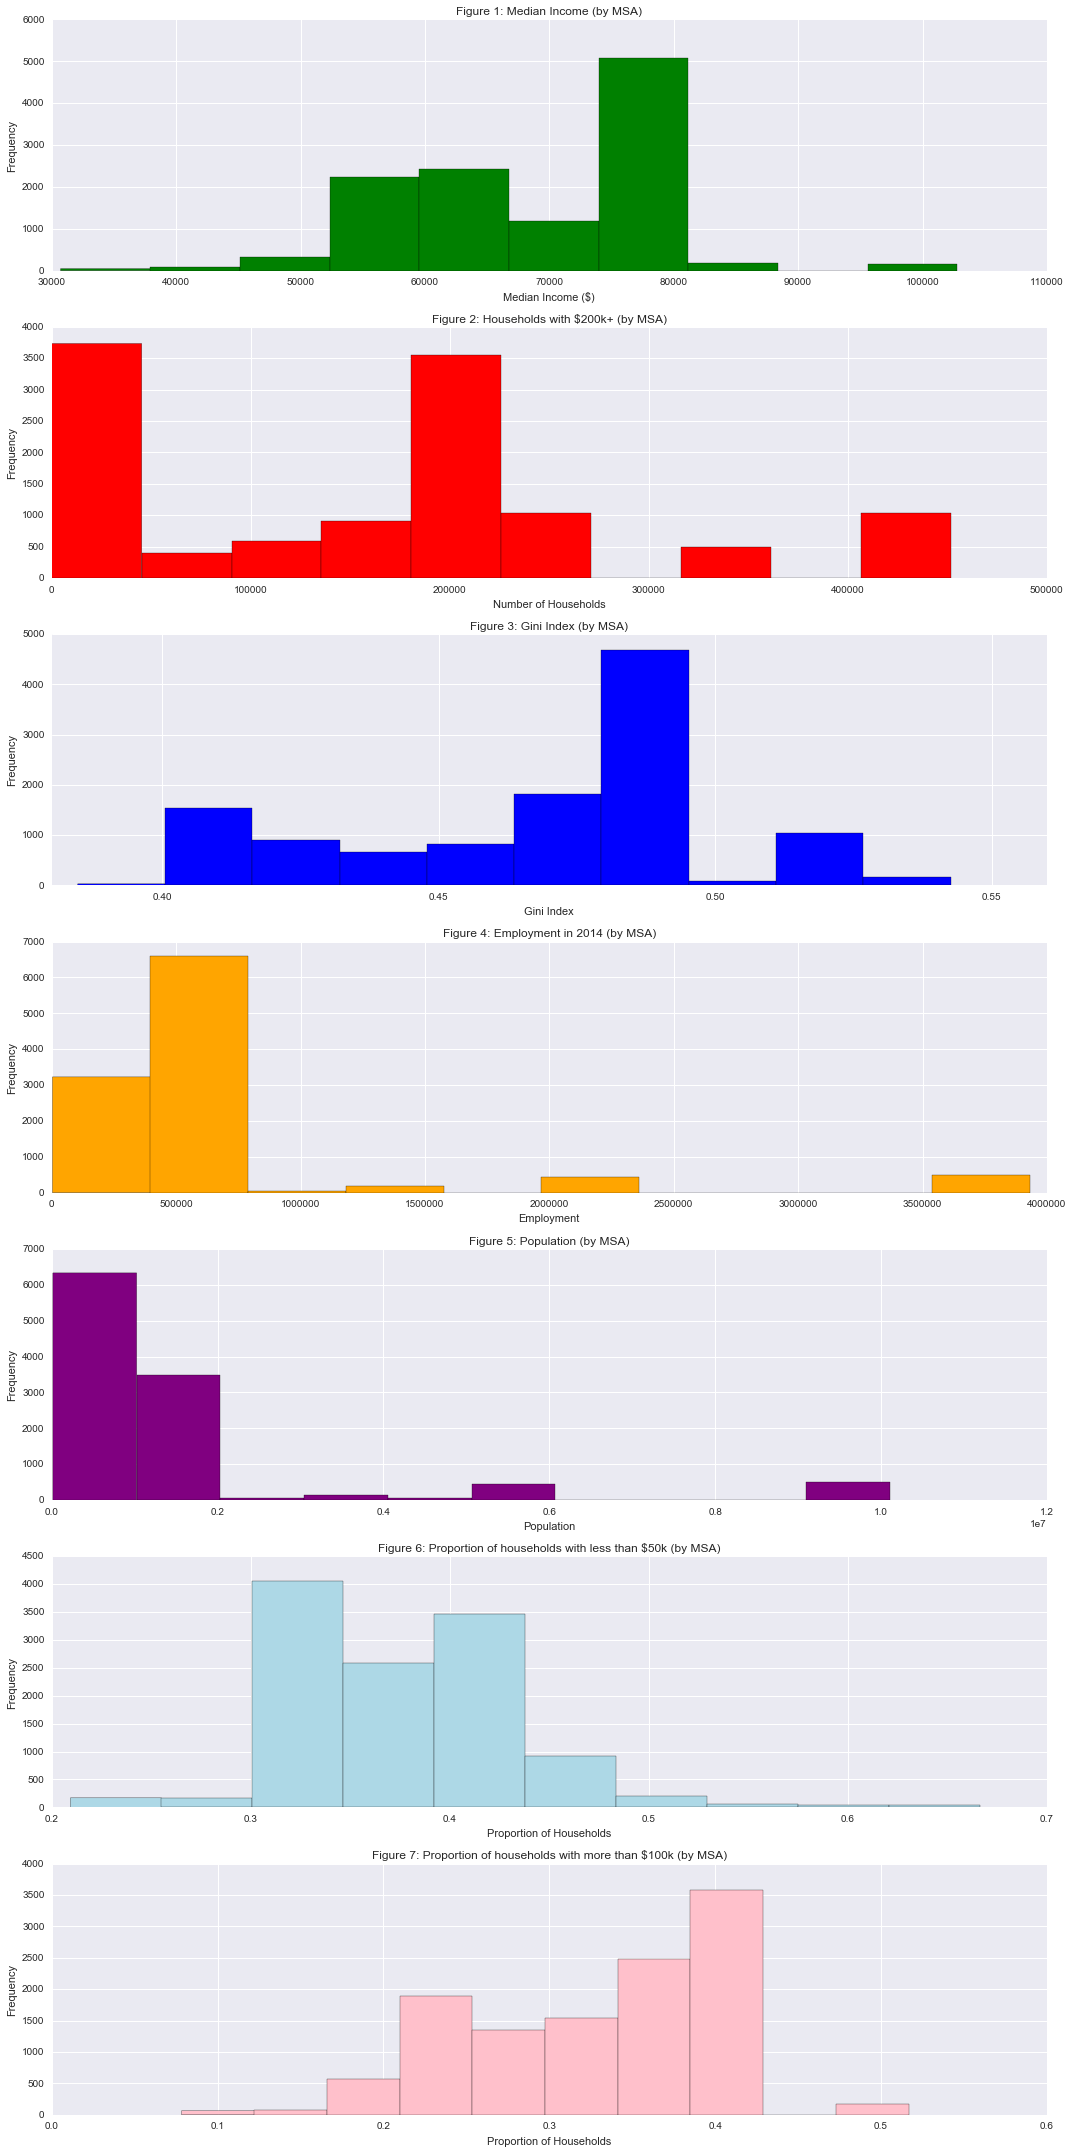

In [38]:
#Plot histograms 
fig, (ax1, ax2,ax3, ax4,ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(15, 30))
ax1 = plot_hist(median_income,
                'Figure 1: Median Income (by MSA)', 
                'Median Income ($)', 
                'green', 
                ax1)
ax2 = plot_hist(households_200k,
                'Figure 2: Households with $200k+ (by MSA)', 
                'Number of Households', 
                'red', 
                ax2)
ax3 = plot_hist(gini_index,
                'Figure 3: Gini Index (by MSA)', 
                'Gini Index', 
                'blue', 
                ax3)
ax4 = plot_hist(employment_14,
                'Figure 4: Employment in 2014 (by MSA)', 
                'Employment', 
                'orange', 
                ax4)
ax5 = plot_hist(population,
                'Figure 5: Population (by MSA)', 
                'Population', 
                'purple', 
                ax5)
ax6 = plot_hist(prop_less_50k,
                'Figure 6: Proportion of households with less than $50k (by MSA)', 
                'Proportion of Households', 
                'lightblue', 
                ax6)
ax7 = plot_hist(prop_more_100k,
                'Figure 7: Proportion of households with more than $100k (by MSA)', 
                'Proportion of Households', 
                'pink', 
                ax7)
plt.tight_layout()
plt.show()

### Graph Discussion
Here, we see that our data distributions appear non-normal for many of the variables we think may be related to venture capital. Therefore, we may need to be careful how we model consider these predictors' distributions.

### Exploring Economic Variables' Relationships.

Next we visualize the relationship between economic variables, which could guide how we structure our model. For instance, we are predicting economic performance (measured by GDP per capita). It is extremely useful to understand which other variables, specifically economic variables, that are also correlated with GDP per capita. 

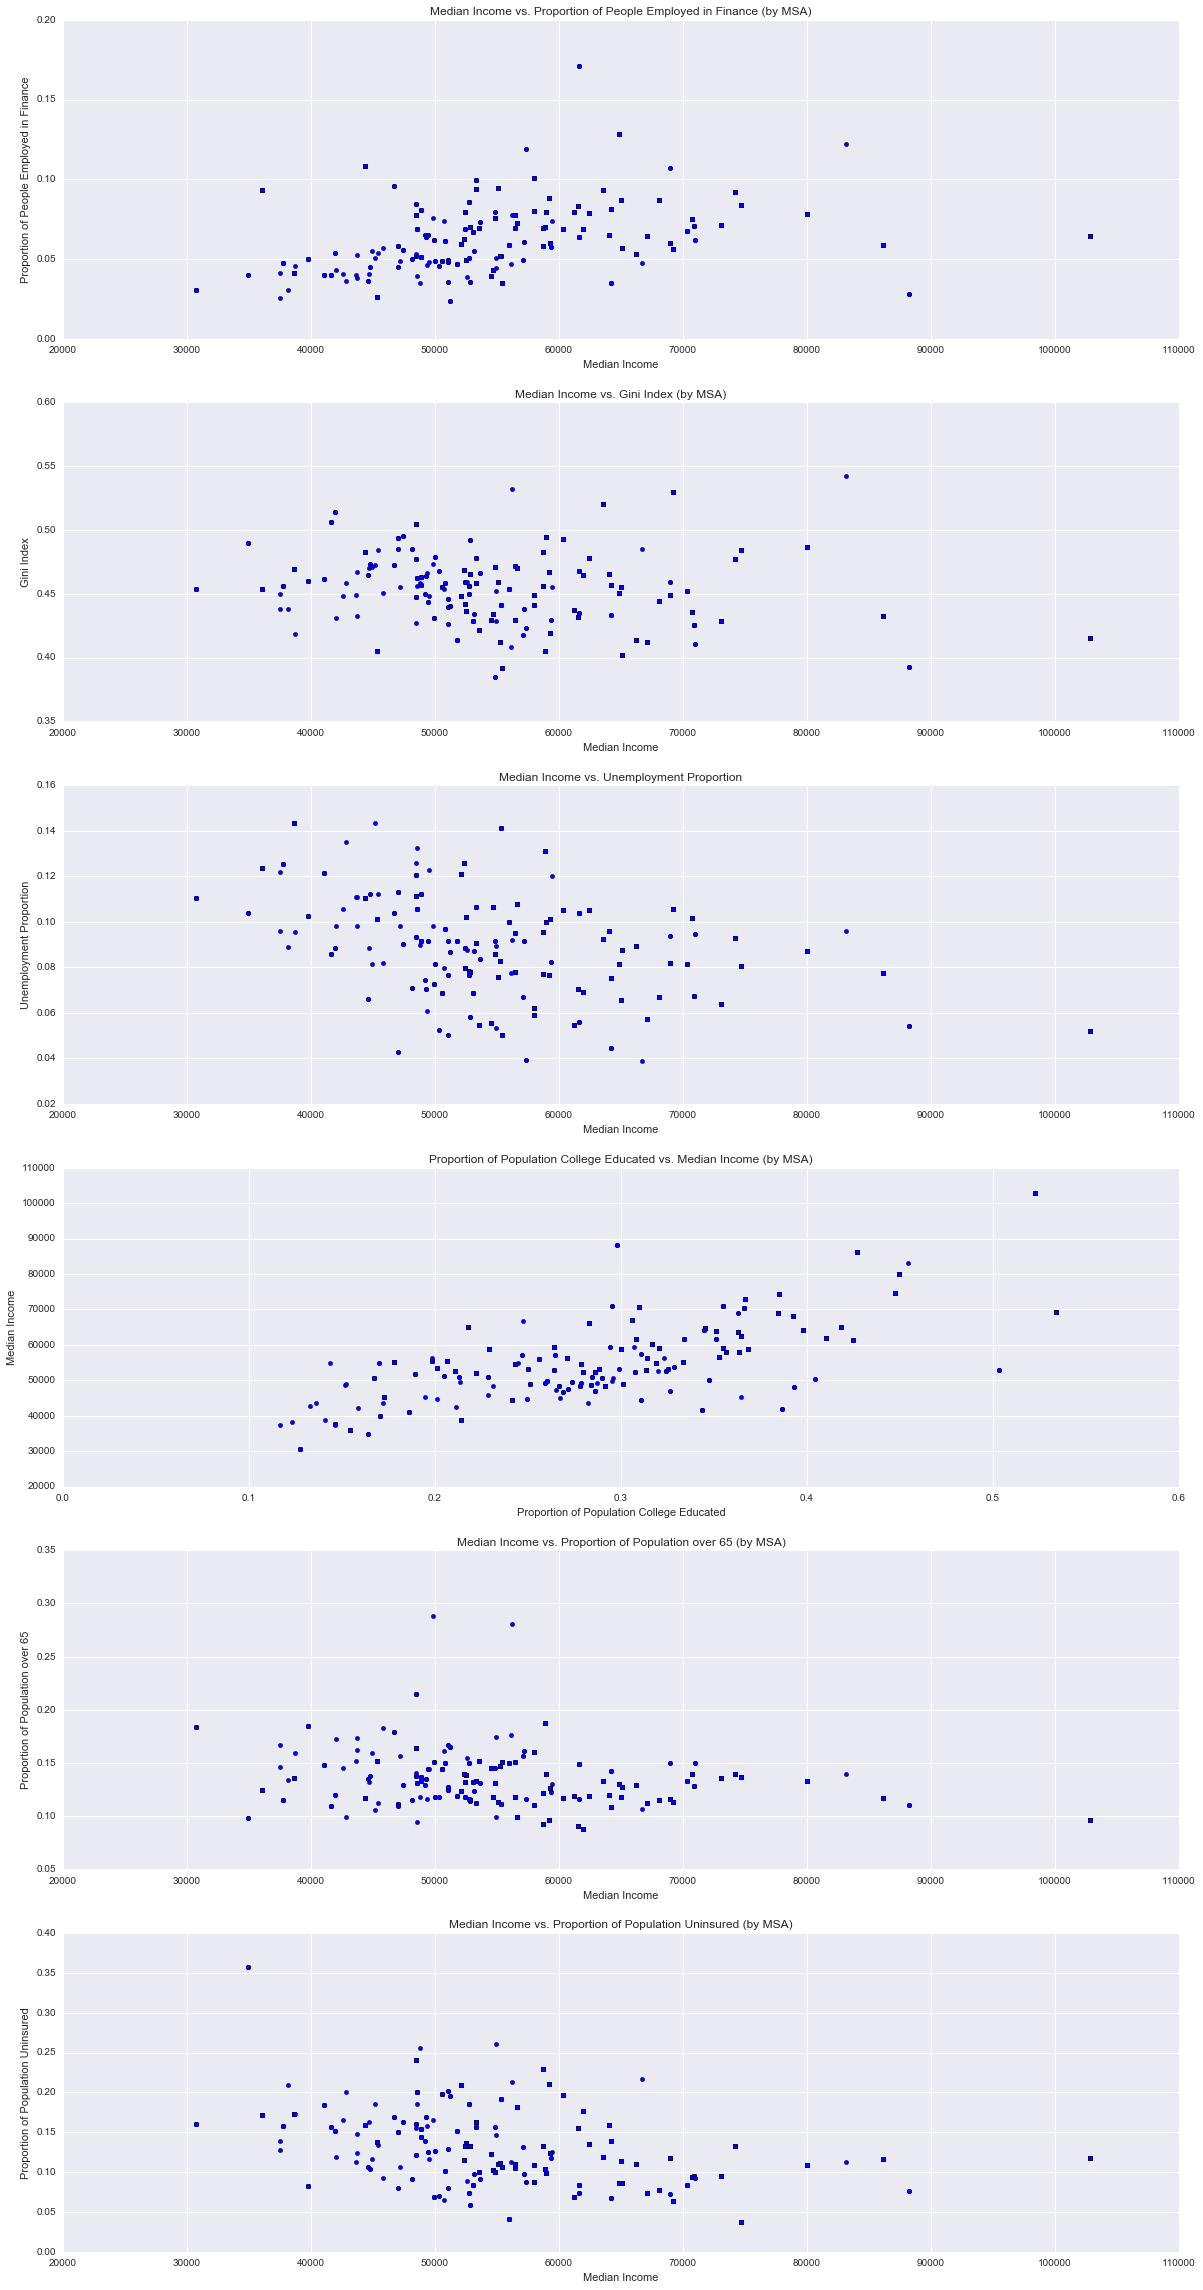

In [39]:
  #plot histograms for each marker and each demographics
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(6, 1, figsize=(20,40))
ax1 = plot_scatter(data_clean['SE_T057_001'],
                finance_employment_prop,
                'Median Income', 'Proportion of People Employed in Finance', 'Median Income vs. Proportion of People Employed in Finance (by MSA)', 
                ax1)
ax2 = plot_scatter(data_clean['SE_T057_001'],
                data_clean['SE_T157_001'],
                'Median Income', 'Gini Index', 'Median Income vs. Gini Index (by MSA)',
                ax2)
ax3 = plot_scatter(data_clean['SE_T057_001'],
               unemployment_rate,
                'Median Income', 'Unemployment Proportion', 'Median Income vs. Unemployment Proportion',
                ax3)
ax4 = plot_scatter(prop_college,
               data_clean['SE_T057_001'],
                'Proportion of Population College Educated', 'Median Income', 'Proportion of Population College Educated vs. Median Income (by MSA)',
                ax4)
ax5 = plot_scatter(data_clean['SE_T057_001'],
              prop_over_65,
                'Median Income', 'Proportion of Population over 65', 'Median Income vs. Proportion of Population over 65 (by MSA)',
                ax5)
ax6 = plot_scatter(data_clean['SE_T057_001'],
               pop_uninsuranced,
                'Median Income', 'Proportion of Population Uninsured', 'Median Income vs. Proportion of Population Uninsured (by MSA)',
                ax6)

### Graph Discussion
For the first graph, we can see that finance is positively correlated with median income, the Gini coefficient has a varied effect on median income, unemployment has a negative relationship with median income, college education has a positive relationship with median income, age seems to have no relationship with median income, and uninsured population has no relationship with median income either.

### Exploring the Relationship Between Venture Capital Funding per Capita and Economic Variables

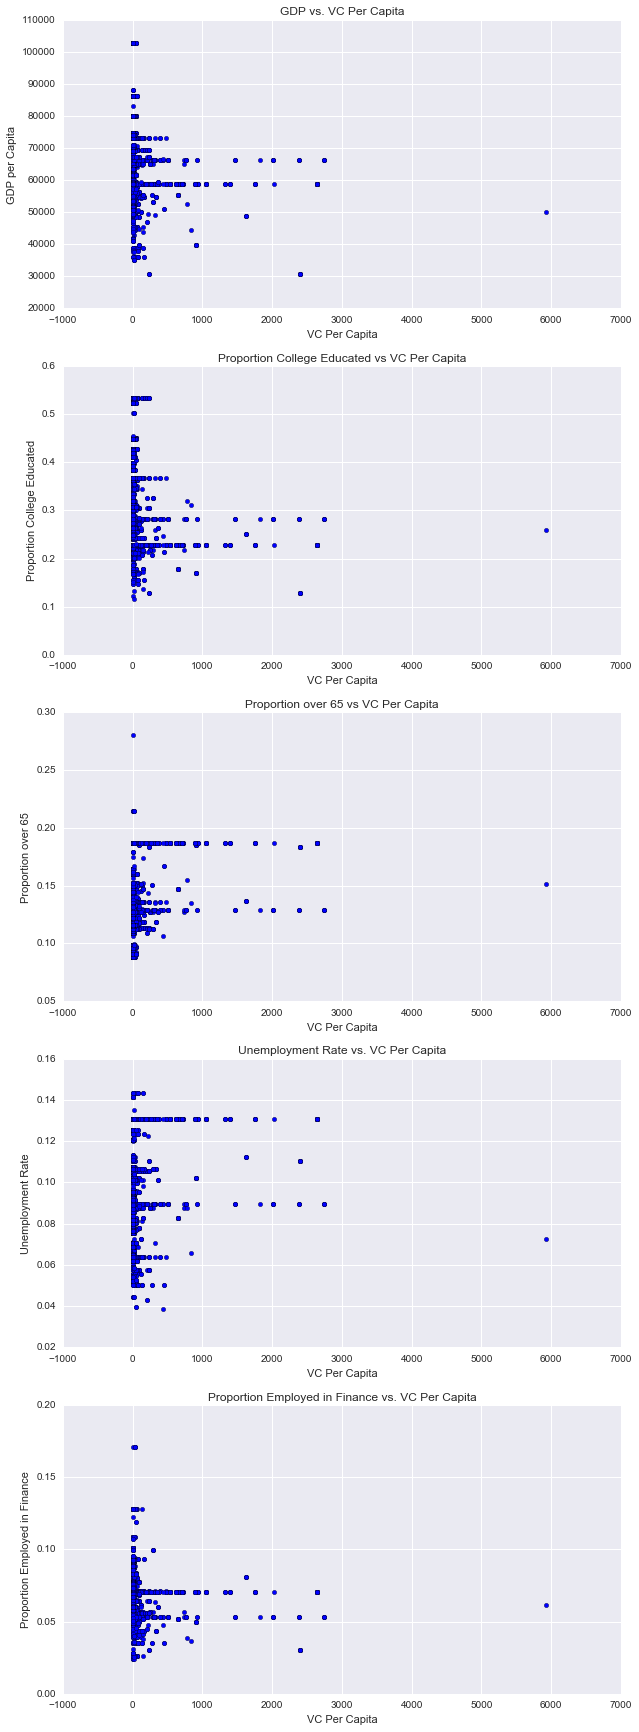

In [40]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(5, 1, figsize=(10,30))
ax1 = plot_scatter(vc_per_cap, gdp_per_cap ,
                
                'VC Per Capita',  'GDP per Capita','GDP vs. VC Per Capita', 
                ax1)

ax2 = plot_scatter(vc_per_cap,prop_college,
               'VC Per Capita',  'Proportion College Educated', 'Proportion College Educated vs VC Per Capita',
                ax2)

ax3 = plot_scatter(vc_per_cap,prop_over_65,
                
                'VC Per Capita', 'Proportion over 65', 'Proportion over 65 vs VC Per Capita',
                ax3)
ax4 = plot_scatter(vc_per_cap,unemployment_rate,
                
                'VC Per Capita', 'Unemployment Rate', 'Unemployment Rate vs. VC Per Capita', 
                ax4)
ax5 = plot_scatter(vc_per_cap,finance_employment_prop,
                
                 'VC Per Capita', 'Proportion Employed in Finance','Proportion Employed in Finance vs. VC Per Capita', 
                ax5)

### Graph Discussion

Here, we don't see any strong relationships between the VC per capita and our predictor variables. This indicates what we would expect intuitively - there are other factors than available resources at hand that allow startups to flourish.

________

# Prediction Model of Economic Performance by Venture Capital Flow


We want to investigate, and model, the relationship between venture capital and economic performance. To do so, we will do the following:


* Uncover the variables that are correlated with venture capital per capita. We will use a step-wise regression of vc per capita on many other variables. 



* Create a model predicting median income using venture capital per capita, along with all of the variables that have a strong relationship with venture capital per capita from (1). 


* Investigate who venture capital funding benefits. We will explore if higher venture capital per capita is associated with higher inequality (as measured by the GINI index). 

## Create Model Relating GDP to VC

## Merge VC and GDP Data

In [41]:
#Merge vc per capita and gdp per capita
mergedlist = zip(gdp_per_cap, vc_per_cap)

mergedlist = pd.DataFrame(mergedlist, columns = ['gdp_per_cap', 'vc_per_cap'])  
mergedlist.head()

,gdp_per_cap,vc_per_cap
0,48438,0.300239
1,48438,NaN
2,48438,NaN
3,48438,NaN
4,48438,NaN


## Imput Missing Values Using the Median

Here, we use the median as we know that we have massive outliers in our data. As a result, we're being cognizant with outliers and using the median instead to find central tendency.

In [42]:
# Define imputer to fill in missing values 
def imputer(data):
    imp = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
    imp.fit(data)
    imp_data = imp.transform(data)
    imp_data = pd.DataFrame(imp_data)
    return imp_data

In [43]:
#Impute data
data_basic = imputer(mergedlist)
data_basic.columns = ['gdp_per_cap', 'vc_per_cap']

## Reshape Data

In [44]:
#Split data into train and test using sklearn 
train, test = train_test_split(data_basic, test_size=0.3, random_state = 200)

x_train = train['gdp_per_cap'].reshape(-1,1)
y_train = train['vc_per_cap'].reshape(-1,1)

x_test= test['gdp_per_cap'].reshape(-1,1)
y_test = test['vc_per_cap'].reshape(-1,1)

## Basic Model without dropping outliers

Linear regression of GDP per capita on venture capital funding per capita

## Basic Model Score

In [45]:
# Basic Model without dropping outliers 
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
print "Model Score:", linreg.score(x_test,y_test)
print "VC Per Capita Coefficient:", linreg.coef_[0]

Model Score: 0.0306694938788
VC Per Capita Coefficient: [-0.00258135]


## Discussion
Here, we see that the model fit is poor and only mildly better than a horizontal line. This matches intuition, as well, as we'd expect there only to be a faint relationship if any.

# Next Steps 
To further refine this, we now drop our outliers. Outliers are dropped due to being situations that most companies will never be. Thus, it seems fair to drop those as extreme situations and not end-results that most companies will arrive at.


## Basic Model with Dropping Outliers

In [46]:
mergedlist3 = data_basic[data_basic.vc_per_cap < 1000]
mergedlist3 = data_basic[data_basic.vc_per_cap > 100]

#Split data into train and test using sklearn 
train, test = train_test_split(mergedlist3, test_size=0.3, random_state = 200)

len(mergedlist3['gdp_per_cap'])
x_train = train['gdp_per_cap'].reshape(-1,1)
y_train = train['vc_per_cap'].reshape(-1,1)

x_test= test['gdp_per_cap'].reshape(-1,1)
y_test = test['vc_per_cap'].reshape(-1,1)

In [47]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
print "Model Score", linreg.score(x_test,y_test)
print "VC Per Capita Coefficient:", linreg.coef_[0]

Model Score -0.00901978600922
VC Per Capita Coefficient: [-0.02252893]


## Step-Wise Regression 

We can use a step-wise regression in Stata to determine which variables are highly correlated with venture captital per capita. 

## Export Dataframe to CSV


In [48]:
#We can export the pandas dataframe to CSV so that we can use Stata
data_clean.to_csv("vc_economics.csv", sep=',')

In [49]:
data_clean.head()

,MSA,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,vc_per_cap
0,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,NaN,Birmingham,Mandaluyong City,angel,41537,2013-09,2013-Q3,2013,340932.0,0.0
1,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,AL,Birmingham,Menlo Park,venture,41341,2013-03,2013-Q1,2013,NaN,NaN
2,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,AL,Birmingham,Menlo Park,venture,41341,2013-03,2013-Q1,2013,NaN,NaN
3,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,AL,Birmingham,Mumbai,series-b,41600,2013-11,2013-Q4,2013,NaN,NaN
4,Birmingham-Hoover,113820,32000US0113820,"Birmingham-Hoover, AL Metro Area; Alabama","Birmingham-Hoover, Alabama",al,320,0,ACSSF,7761,...,GA,Atlanta,Mumbai,series-b,41600,2013-11,2013-Q4,2013,NaN,NaN


In [50]:
#Deine variables to be used for plotting 
prop_college = data_clean['prop_college']
prop_over_65 = data_clean['prop_over_65']
pop_uninsuranced = data_clean['pop_uninsuranced']
unemployment_rate = data_clean['unemployment_rate']
finance_employment_prop = data_clean['finance_employment_prop']
msa = data_clean['MSA']
median_income = data_clean['SE_T057_001']
households_200k = data_clean['SE_T056_017']
state = data_clean['Geo_STUSAB']
gini_index = data_clean['SE_T157_001']
employment_14 = data_clean['2014 Employment']
professional_degree = data_clean['SE_T150_007']
population = data_clean['2014 Population']
prop_less_50k = data_clean['SE_T056_009_p']
prop_more_100k = data_clean['SE_T056_014_p']

## Advanced Model
Our advanced model includes the variables that were found to be significant using the step-wise regression. Thus, we hope that this economic model is a better predictor of median income that a simply VC per capita model.


## Step-Wise Regression

We want to create an economic model to gain insights into the influence of venture funding per capita on the economic performance of an MSA. First, we need to identify the relevant variables - specifically economic variables - to include in a model like this. In other words, we want to determine which variables are significant in predicting the economic performance (as measure by median income) of an MSA. 

Applying a stepwise method in Stata, we found that proportion of people employed in finance, Gini Index, Unemployment Proportion, Proportion of Population College Educated,  Proportion of Population over 65, and Proportion of Population Uninsured are the significant predictors.


In [51]:
#Define response variable as median income
y = data_clean[['SE_T057_001']]

#x = large2.drop("SE_T057_001", 1)

#funding round type, year, employment, population, 
x = data_clean[['finance_employment_prop', 'SE_T157_001', 'unemployment_rate', 'prop_over_65', 'pop_uninsuranced', 'prop_college', 'vc_per_cap']]

x = pd.get_dummies(x)

data_advanced = pd.concat([x, y], axis=1, ignore_index=True)

In [52]:
data_advanced.head()

,0,1,2,3,4,5,6,7
0,0.084694,0.477,0.093197,0.137293,0.121105,0.27782,0.0,48438
1,0.084694,0.477,0.093197,0.137293,0.121105,0.27782,NaN,48438
2,0.084694,0.477,0.093197,0.137293,0.121105,0.27782,NaN,48438
3,0.084694,0.477,0.093197,0.137293,0.121105,0.27782,NaN,48438
4,0.084694,0.477,0.093197,0.137293,0.121105,0.27782,NaN,48438


In [53]:
#Fill in missing values
data_advanced = imputer(data_advanced)

In [54]:
#Split data into train and test using sklearn 
train, test = train_test_split(data_advanced, test_size=0.3, random_state = 200)

In [55]:
#Define response variable
y_train = train[len(train.columns) - 1]

#Define predictors
x_train = train.drop(len(train.columns) - 1, 1)

#Define response variable
y_test = test[len(test.columns) - 1]

#Define predictors
x_test = test.drop(len(test.columns) - 1, 1)

## Advanced Model Score

In [56]:
def score_model(model_used):
    
    #Model used
    model = model_used

    #Fit model
    model.fit(x_train, y_train)
    
    score = model.score(x_test, y_test)
    
    return score

print "Decision Tree Score", score_model(DecisionTree())
print "Logistic Regression Score", score_model(LogisticRegression())
print "Random Forest Score", score_model(RandomForest())

Decision Tree Score 0.996878547106
Logistic Regression Score 0.545119182747
Random Forest Score 0.997162315551


## The Impact of Venture Capital

So the model above clearly performs quite well. However, we want to uncover the influence of venture capital on this model. We can do so using the feature_importance_function below:

In [60]:
model = RandomForest()
model.fit(x_train, y_train)
model.score(x_test, y_test)
importances = model.feature_importances_
print(importances)

[ 0.13667791  0.15960468  0.13397822  0.23129196  0.09433317  0.24259126
  0.00152279]


In [61]:
print "The Importance of Venture Capital Per Capita in the Model: ", (importances)[6]

The Importance of Venture Capital Per Capita in the Model:  0.0015227934682


## The Impact of Venture Capital Discussion

We can see above that venture capital per capita has little effect on the model. Venture capital per capita has a 0.15% importance in the model.


## Conclusion

We've made some insight into the world of startup funding, but there is a lot still to learn about venture capital, in regards to both trends and effects. We documented the growing importance of venture capital in the U.S. economy, and the ways in which it operates. We've visualized and interpreted series trends, geographical trends, sector trends, and acquisition trends. In addition, we've visualized and interpreted the relationship between venture capital and some economy variables such as median income. We've even created three models: to predict venture capital funding of a start-up, to predict the likelihood of a startup being acquired, and to investigate the relationship between venture capital per capital and median income. 

Our robust dataset, paired with the increasing prevalence of data related to venture capital, creates numerous directions of future research. Here are some of those questions: 

#### Further Questions


* How much does venture capital funding increase the chances of a company surviving?
* Does the type of funding a company receives matter?
* How many startup closings are company related and how much investor related (fund insolvency for example)?
